# Use of Solitary Confinement at Northwest ICE Processing Center\*
## UW Center for Human Rights preliminary report, November 2019

Data analyzed:

1. Dataset of solitary confinement placements at NWDC relased to UWCHR via FOIA on February 22, 2019
2. Dataset of national solitary confinement placements in ICE detention analyzed by International Consortium of Investigative Journalists (Spencer Woodman, Karrie Kehoe, Maryam Saleh, and Hannah Rappleye, ["Thousands of Immigrants Suffer In US Solitary Confinement"]((https://www.icij.org/investigations/solitary-voices/thousands-of-immigrants-suffer-in-us-solitary-confinement/)), ICIJ, May 21 2019)
3. Dataset of national solitary confinement placements in ICE detention analyzed by Project on Government Oversight (POGO, ["ISOLATED: ICE Confines Some Detainees with Mental Illness in Solitary for Months"](https://www.pogo.org/investigation/2019/08/isolated-ice-confines-some-detainees-with-mental-illness-in-solitary-for-months/), August 14 2019)

\* This report uses the term "solitary confinement" to describe practices named by ICE and GEO Group as "administrative segregation" or "disciplinary segregation". This report interchangably uses the titles "Northwest ICE Processing Center" (the title currently employed by ICE) and "Northwest Detention Center (NWDC)" (the former title used during the time period covered by this report) to refer to the immigration prison in Tacoma, Washington privately owned and operated by GEO Group on behalf of ICE.

## Dataset Description and Analysis

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [111]:
csv_opts = {'sep': '|',
            'quotechar': '"',
            'compression': 'gzip',
            'encoding': 'utf-8'}

df = pd.read_csv('../input/srms-1.csv.gz',
                 parse_dates=['placement_date', 'release_date'],
                 **csv_opts)
print(df.info())
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   tracking_number                      371 non-null    int64         
 1   gender                               371 non-null    object        
 2   country_of_citizenship               371 non-null    object        
 3   facility_aor                         371 non-null    object        
 4   facility                             371 non-null    object        
 5   facility:detloc                      371 non-null    object        
 6   report_type                          371 non-null    object        
 7   placement_date                       371 non-null    datetime64[ns]
 8   placement_reason                     371 non-null    object        
 9   release_date                         357 non-null    datetime64[ns]
 10  length_of_stay

,tracking_number,gender,country_of_citizenship,facility_aor,facility,facility:detloc,report_type,placement_date,placement_reason,release_date,...,non_compliance_detail,special_criteria,id,current_review,created,lgbti,item_type,placement_reason_type,admin_or_disciplinary,detloc
0,12442,Male,MOROCCO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,2018-05-14,Medical: Observation,2018-05-29,...,NaN,Yes,12442,14.0,5/23/2018,NaN,Item,Medical,Administrative,CSCNWWA
1,12439,Male,ERITREA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,2018-05-11,Protective Custody: Other Detainee Safety,NaT,...,NaN,No,12439,14.0,5/22/2018,NaN,Item,Protective Custody,Administrative,CSCNWWA
2,12438,Male,INDIA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,2018-05-20,Facility Security Threat: Other,NaT,...,NaN,Yes,12438,14.0,5/22/2018,NaN,Item,Facility Security Threat,Administrative,CSCNWWA
3,12437,Male,RUSSIA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,2018-05-19,Disciplinary,NaT,...,NaN,Yes,12437,14.0,5/22/2018,NaN,Item,Disciplinary,Disciplinary,CSCNWWA
4,12436,Female,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2018-04-30,Facility Security Threat: Other,NaT,...,NaN,Yes,12436,30.0,5/22/2018,NaN,Item,Facility Security Threat,Administrative,CSCNWWA


The following code section checks that the "Tracking Number" value for each record is unique; checks that no solitary record release date precedes placement date; and prints some basic characteristics of the dataset:

In [112]:
assert len(df[df['release_date'] < df['placement_date']]) == 0
assert len(df) == len(set(df['tracking_number']))
print(f'{len(df)} total unique records.')
print()
print(f'Earliest placement date: {df.placement_date.min()}')
print(f'Latest placement date: {df.placement_date.max()}')
print()
print(f'Earliest release date: {df.release_date.min()}')
print(f'Latest release date: {df.release_date.max()}')
print()
print('Solitary pop. countries of citizenship (Top 10):')
print(df['country_of_citizenship'].value_counts(dropna=False).head(10))
print()
print('Solitary population by gender:')
print(df['gender'].value_counts(dropna=False).head(10))

371 total unique records.

Earliest placement date: 2013-05-13 00:00:00
Latest placement date: 2018-05-20 00:00:00

Earliest release date: 2013-07-16 00:00:00
Latest release date: 2018-05-31 00:00:00

Solitary pop. countries of citizenship (Top 10):
MEXICO         194
CANADA          20
GUATEMALA       18
EL SALVADOR     17
SOMALIA         13
HONDURAS         9
RUSSIA           8
ARGENTINA        7
UKRAINE          7
ETHIOPIA         5
Name: country_of_citizenship, dtype: int64

Solitary population by gender:
Male      340
Female     31
Name: gender, dtype: int64


In [113]:
top_10 = pd.DataFrame(df['country_of_citizenship'].value_counts(dropna=False).head(10))

In [114]:
all_others = df[~df['country_of_citizenship'].isin(list(top_10.index))]

In [115]:
top_10.loc['ALL OTHERS', 'country_of_citizenship'] = len(all_others)

In [116]:
print(top_10)

             country_of_citizenship
MEXICO                        194.0
CANADA                         20.0
GUATEMALA                      18.0
EL SALVADOR                    17.0
SOMALIA                        13.0
HONDURAS                        9.0
RUSSIA                          8.0
ARGENTINA                       7.0
UKRAINE                         7.0
ETHIOPIA                        5.0
ALL OTHERS                     73.0


Total solitary placements per calendar year:

In [117]:
g_annual = df.set_index('placement_date').groupby(pd.Grouper(freq='AS'))
g_annual['tracking_number'].nunique()

placement_date
2013-01-01    60
2014-01-01    82
2015-01-01    76
2016-01-01    42
2017-01-01    74
2018-01-01    37
Freq: AS-JAN, Name: tracking_number, dtype: int64

Total solitary placements per fiscal year:

In [118]:
g_fy = df.set_index('placement_date').groupby(pd.Grouper(freq='AS-OCT'))
g_fy['tracking_number'].nunique()

placement_date
2012-10-01    25
2013-10-01    95
2014-10-01    74
2015-10-01    57
2016-10-01    59
2017-10-01    61
Freq: AS-OCT, Name: tracking_number, dtype: int64

Average monthly solitary placements per year:

In [119]:
g_monthly = df.set_index('placement_date').groupby(pd.Grouper(freq='MS'))
g_monthly['tracking_number'].nunique().resample('AS').mean()

placement_date
2013-01-01    7.500000
2014-01-01    6.833333
2015-01-01    6.333333
2016-01-01    3.500000
2017-01-01    6.166667
2018-01-01    7.400000
Freq: AS-JAN, Name: tracking_number, dtype: float64

In [120]:
len(df.set_index('placement_date')['2013-06-01':'2014-06-01'])

98

The following code section generates a visualization of the number of solitary confinement placements per month for the time period covered by the dataset:

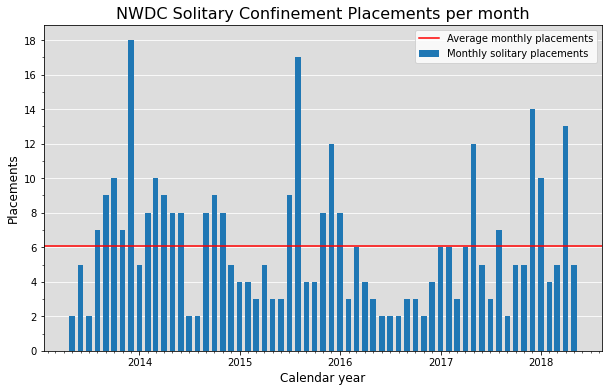

Minimum monthly solitary placements: 2
Maximum monthly solitary placements: 18 in December 2013
Overall average monthly solitary placements: 6.081967213114754


In [121]:
data = g_monthly['tracking_number'].nunique()

years_loc = mdates.YearLocator()
months_loc = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')
ax.bar(data.index, data, width=20)
ax.xaxis.set_minor_locator(months_loc)
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
ax.axhline(data.mean(), color='r')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.title('NWDC Solitary Confinement Placements per month', fontsize=16)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Calendar year', fontsize=12)
plt.legend(('Average monthly placements', 'Monthly solitary placements'), loc='upper right')

plt.show()

print(f'Minimum monthly solitary placements: {data.min()}')
print(f'Maximum monthly solitary placements: {data.max()} in {data.idxmax().month_name()} {data.idxmax().year}')
print(f'Overall average monthly solitary placements: {data.mean()}')

In [122]:
data = df.set_index('placement_date').groupby([pd.Grouper(freq='Q-OCT')])['placement_reason_type'].value_counts().unstack()
data.index = [f'{x.year} Q{x.quarter}' for x in data.index]

In [123]:
data = data[['Disciplinary',
            'Pending Disciplinary',
            'Protective Custody',
            'Facility Security Threat',
            'Hunger Strike',
            'Medical',
            'Mental Illness',
            'Other']]

In [124]:
# reds = cm.Reds(128)
# blues = cm.Blues(range(0,256,32))
# colors = np.vstack([reds, blues])

In [125]:
# colors = ['#FF0000','#00FF00', '#00EE00', '#00DD00', '#00CC00', '#00BB00', '#00AA00', '#008800']

In [126]:
# # To convert data to proportional
# totals = data.sum(axis=1).to_list()
# for col in data.columns:
#     data[col] = [i / j * 100 for i,j in zip(data[col], totals)]

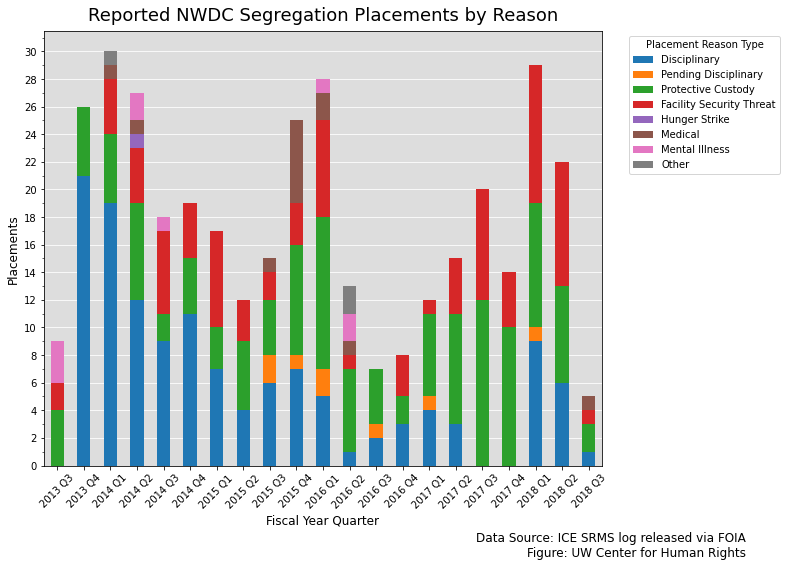

In [127]:
fig, ax = plt.subplots(figsize=(10,6))

p1 = data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), color=cm.tab10(range(0,8,1)))
# p1 = data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), edgecolor='#000000', color=colors)

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.xticks(rotation=45)

plt.title('Reported NWDC Segregation Placements by Reason', fontsize=18, pad=10)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Fiscal Year Quarter', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Placement Reason Type')

txt='Data Source: ICE SRMS log released via FOIA\nFigure: UW Center for Human Rights'
plt.figtext(1.1, -.03, txt, wrap=True, horizontalalignment='right', fontsize=12)

plt.show();

In [128]:
data = df.set_index('placement_date').groupby([pd.Grouper(freq='Q-OCT')])['admin_or_disciplinary'].value_counts().unstack()
data.index = [f'{x.year} Q{x.quarter}' for x in data.index]

In [129]:
data = data.fillna(0)

In [130]:
# # To convert data to proportional
totals = data.sum(axis=1).to_list()
for col in data.columns:
    data[col] = [i / j * 100 for i,j in zip(data[col], totals)]

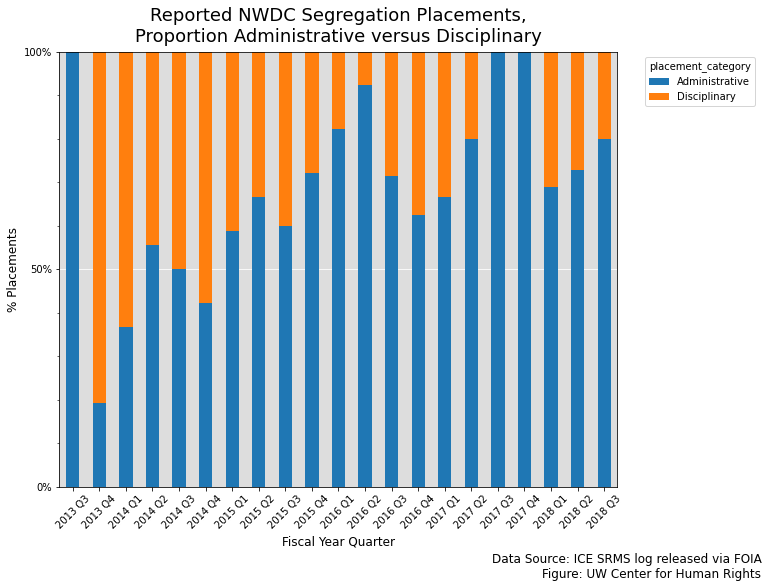

In [131]:
fig, ax = plt.subplots(figsize=(10,6))

p1 = data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), color=cm.tab10(range(0,8,1)))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')

ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)

plt.title('Reported NWDC Segregation Placements,\nProportion Administrative versus Disciplinary', fontsize=18, pad=10)
# plt.title('Reported NWDC Segregation Placements', fontsize=18, pad=10)
plt.ylim(0, 100)
plt.ylabel('% Placements', fontsize=12)
# plt.ylabel('Placements', fontsize=12)
plt.xlabel('Fiscal Year Quarter', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='placement_category')

txt='Data Source: ICE SRMS log released via FOIA\nFigure: UW Center for Human Rights'
plt.figtext(1.1, -.03, txt, wrap=True, horizontalalignment='right', fontsize=12)

plt.show();

In [132]:
# df['mental_illness'] = df['mental_illness'].replace({'Yes': 'Mental Illness', 'No':'None'})

In [133]:
data = df.set_index('placement_date').groupby([pd.Grouper(freq='Q-OCT')])['mental_illness'].value_counts(dropna=False).unstack()
data.index = [f'{x.year} Q{x.quarter}' for x in data.index]

In [134]:
data = data[['None', 'Mental Illness', 'Serious Mental Illness']]

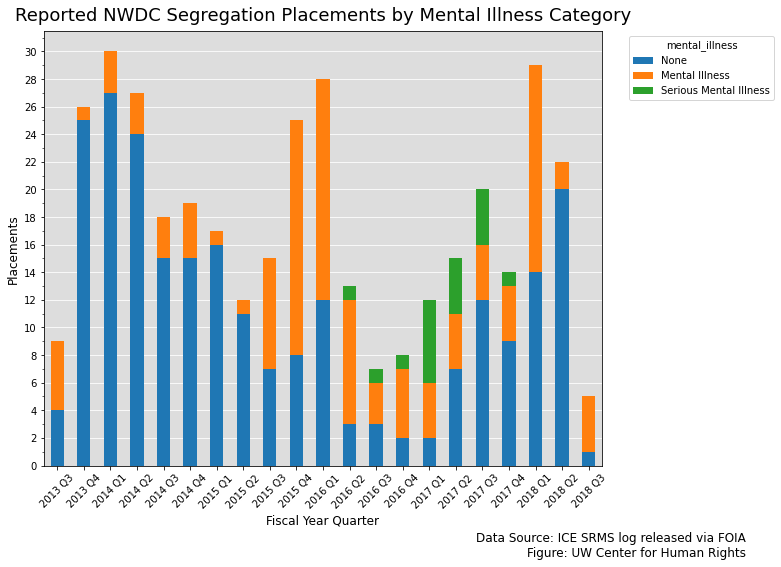

In [135]:
fig, ax = plt.subplots(figsize=(10,6))

data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), color=cm.tab10(range(0,8,1)))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.xticks(rotation=45)

plt.title('Reported NWDC Segregation Placements by Mental Illness Category', fontsize=18, pad=10)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Fiscal Year Quarter', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='mental_illness')
txt='Data Source: ICE SRMS log released via FOIA\nFigure: UW Center for Human Rights'
plt.figtext(1.1, -.03, txt, wrap=True, horizontalalignment='right', fontsize=12)

plt.show();

In [136]:
df['mental_illness'].value_counts(dropna=False)

None                      237
Mental Illness            116
Serious Mental Illness     18
Name: mental_illness, dtype: int64

### Calculating time in solitary confinement

We see in the following code section that several records do not have an "Release Date" specified. All of these records are segregation placements beginning during the latter portion of the dataset, which suggests that these refer to individuals who remained in solitary confinement at the time of production of this dataset.

In [137]:
null_start = df['placement_date'].isnull()
assert sum(null_start) == 0
null_end = df['release_date'].isnull()
print('No missing placement dates.')
print(f'{sum(null_end)} records with missing release dates.')
print()
print('Description of "Placement Date" for records with no "Release Date":')
print(df[null_end]['placement_date'].describe())
print()

No missing placement dates.
14 records with missing release dates.

Description of "Placement Date" for records with no "Release Date":
count                      14
unique                     14
top       2018-05-20 00:00:00
freq                        1
first     2017-03-08 00:00:00
last      2018-05-20 00:00:00
Name: placement_date, dtype: object



For purposes of analysis, we set the release date for individuals still in solitary confinement to that of the latest date represented in the dataset, allowing us to calculate minimum total solitary confinement length for all records:

In [138]:
df_pre_fill = df.copy()
df['release_date'] = df['release_date'].fillna(df['release_date'].max())
df['solitary_length'] = df['release_date'] - df['placement_date']
df['solitary_length'].describe()

count                        371
mean     62 days 02:11:58.059299
std      90 days 17:10:02.682051
min              1 days 00:00:00
25%             19 days 00:00:00
50%             31 days 00:00:00
75%             65 days 00:00:00
max            781 days 00:00:00
Name: solitary_length, dtype: object

After setting missing release dates to latest date represented in dataset, we examine the 14 records in question and see that for all measures except maximum time, they represent individuals with longer solitary stays:

In [139]:
df[null_end]['solitary_length'].describe()

count                          14
mean            125 days 12:00:00
std      127 days 23:44:12.363245
min              11 days 00:00:00
25%              28 days 18:00:00
50%             101 days 12:00:00
75%             178 days 00:00:00
max             449 days 00:00:00
Name: solitary_length, dtype: object

By comparison, we note that excluding records without a specified release date results in a decreased average length of solitary confinement:

In [140]:
df_drop = df_pre_fill.dropna(subset=['release_date'], axis=0).copy()
df_drop.loc[:, 'solitary_length'] = df_drop['release_date'] - df_drop['placement_date']
df_drop['solitary_length'].describe()

count                        357
mean     59 days 14:31:15.630252
std      88 days 06:18:57.166750
min              1 days 00:00:00
25%             19 days 00:00:00
50%             30 days 00:00:00
75%             62 days 00:00:00
max            781 days 00:00:00
Name: solitary_length, dtype: object

In [141]:
# Using dataset with minimum total solitary length for all records
df['days_solitary'] = df['solitary_length'] / np.timedelta64(1, 'D')
df.loc[:, 'log_days_solitary'] = np.log(df['days_solitary'])

In [142]:
# Testing that no solitary placement has negative stay length
assert sum(df['days_solitary'] < 0) == 0

A histogram of solitary placement lengths shows that the vast majority of placement are less than 50 days, but the distribution has a wide distribution to a maximum of 781 days.

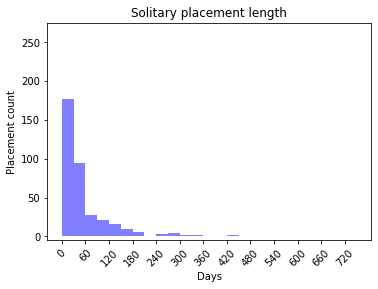

In [143]:
num_bins = np.arange(0,780,30)
data = df['days_solitary']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('Days')
plt.xticks(np.arange(0, 780, step=60), rotation=45)
plt.ylabel('Placement count')
plt.yticks(np.arange(0, 300, step=50))
plt.ylim(-5, 275)
plt.title('Solitary placement length')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

82 solitary placements were for stays longer than 75 days:

In [144]:
sum(df['days_solitary'] > 75)

82

In [145]:
sum(df['days_solitary'] > 15)

302

In [146]:
sum(df['days_solitary'] > 15) / len(df['days_solitary'])

0.8140161725067385

In [147]:
sum(df['days_solitary'] > 30)

188

In [148]:
sum(df['days_solitary'] > 30) / len(df)

0.5067385444743935

In [149]:
round(sum(df['days_solitary'] <= 30) / len(df) * 100, 2)

49.33

We can plot length of solitary stay by date of placement. Note that as we might expect, the longest placement falls early in the timeline; as noted above some placements were apparently ongoing at the time of release of this data, and we represent the minimum amount of solitary time (orange points):

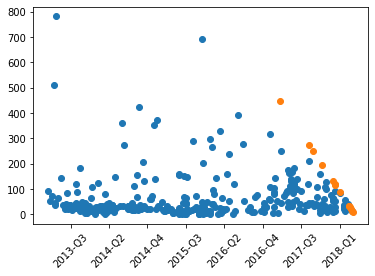

In [150]:
x=df[~null_end].loc[:, 'placement_date'].astype(int)
y=df[~null_end].loc[:,'days_solitary']

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y)

x=df[null_end].loc[:, 'placement_date'].astype(int)
y=df[null_end].loc[:,'days_solitary']
plt.scatter(x, y)

xticks = ax.get_xticks()
xticks_dates = [str(f'{pd.to_datetime(x).year}-Q{pd.to_datetime(x).quarter}') for x in xticks]
ax.set_xticklabels(xticks_dates,  rotation=45)
plt.show()
plt.close(fig=fig)
del fig, ax

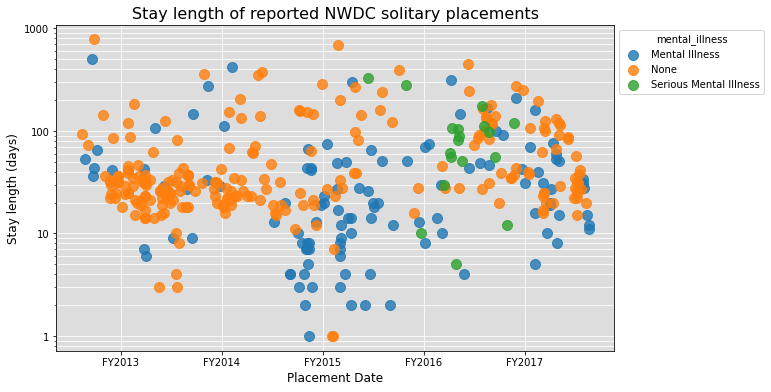

In [151]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'mental_illness'
values = df[to_plot].unique()

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())

# x_min = xticks.min()-10000000000000000
# x_max = xticks.max()+10000000000000000
# ax.hlines(14, xmin=x_min, xmax=x_max, linestyles='dashed')

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

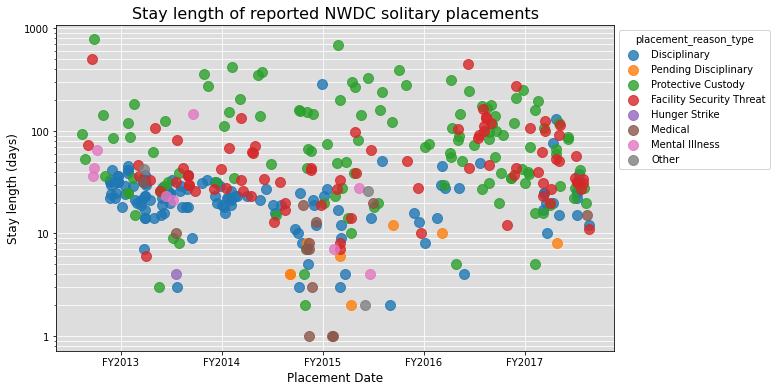

In [152]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'placement_reason_type'
# values = df[to_plot].unique()
values = ['Disciplinary',
        'Pending Disciplinary',
        'Protective Custody',
        'Facility Security Threat',
        'Hunger Strike',
        'Medical',
        'Mental Illness',
        'Other']

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
# yticks = ax.get_yticks()
# yticks = np.append(yticks, np.array([14, 30]))
# ax.set_yticklabels(yticks)

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))

# ax.axhline(14, color='#000000', linestyle='dashed')
# ax.axhline(30, color='#000000', linestyle='dashed')

plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

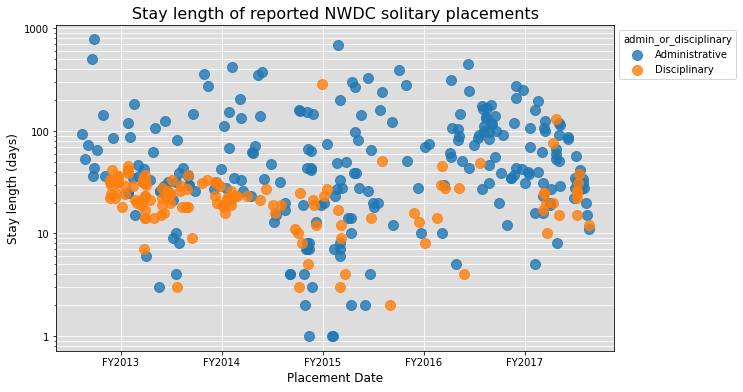

In [153]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'admin_or_disciplinary'
values = df[to_plot].unique()

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
# yticks = ax.get_yticks()
# yticks = np.append(yticks, np.array([14, 30]))
# ax.set_yticklabels(yticks)

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))

# ax.axhline(14, color='#000000', linestyle='dashed')
# ax.axhline(30, color='#000000', linestyle='dashed')

plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

In [154]:
df['attorney_notification'].value_counts(dropna=False)

No     282
NaN     50
Yes     39
Name: attorney_notification, dtype: int64

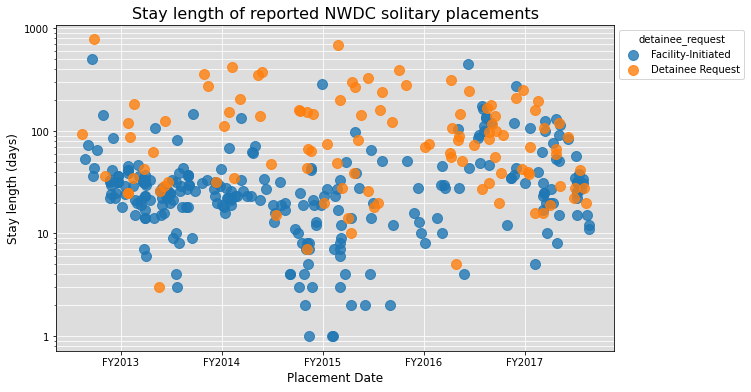

In [155]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'detainee_request'
values = df[to_plot].unique()

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
# yticks = ax.get_yticks()
# yticks = np.append(yticks, np.array([14, 30]))
# ax.set_yticklabels(yticks)

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))

# ax.axhline(14, color='#000000', linestyle='dashed')
# ax.axhline(30, color='#000000', linestyle='dashed')

plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

Values vary greatly, and the average solitary placement length is much lower than the maximum, so we can use a log transformation to get a better idea of distribution. These rough visualizations of trend in solitary stay length over time suggest a slight apparent increase. More statistically rigorous work would be needed to explore whether this trend is significant.

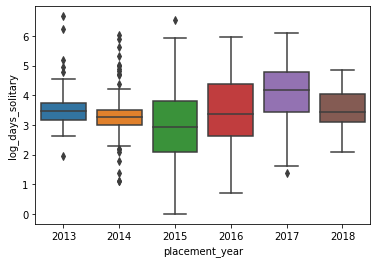

In [156]:
df['placement_year'] = df['placement_date'].map(lambda x: x.year)
ax = sns.boxplot(data=df, x="placement_year", y="log_days_solitary")

Solitary placement length by gender:

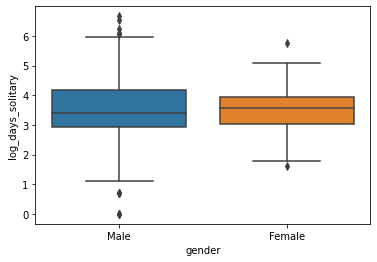

In [157]:
ax = sns.boxplot(data=df, x="gender", y="log_days_solitary")

Solitary length for nationalities with > 5 placements:

In [158]:
coc_count = df['country_of_citizenship'].value_counts()
coc_list = list(coc_count[coc_count > 1].index)
mask = df['country_of_citizenship'].isin(coc_list)

In [159]:
order = df[mask].groupby(by=["country_of_citizenship"])["log_days_solitary"].median().sort_values(ascending=False).index

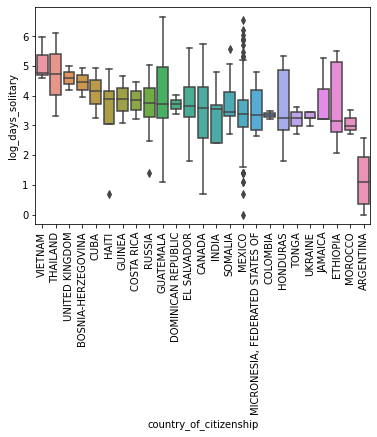

In [160]:
ax = sns.boxplot(data=df[mask], x="country_of_citizenship", y="log_days_solitary", order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Solitary placements coded as detainee requested tend to be longer than facility-iniated placements:

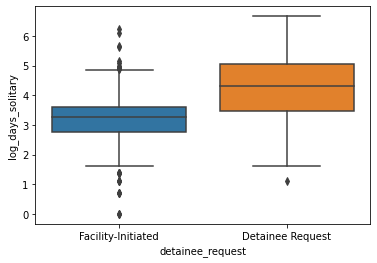

In [161]:
ax = sns.boxplot(data=df, x="detainee_request", y="log_days_solitary")
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

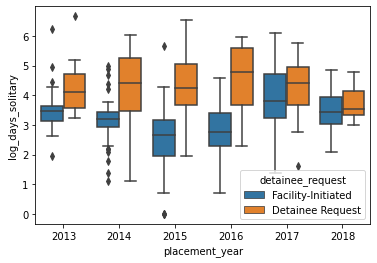

In [162]:
sns.boxplot(x='placement_year',y='log_days_solitary',data=df,hue='detainee_request')

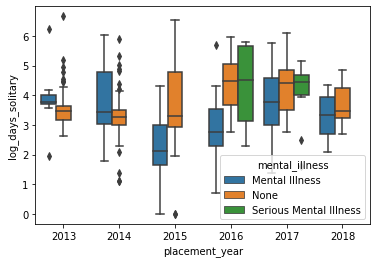

In [163]:
sns.boxplot(x='placement_year',y='log_days_solitary',data=df,hue='mental_illness')

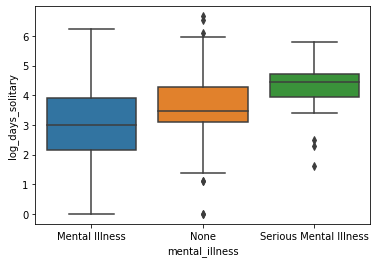

In [164]:
sns.boxplot(x='mental_illness',y='log_days_solitary',data=df)

In [165]:
df.set_index('placement_date').groupby(['mental_illness'])['days_solitary'].describe()

,count,mean,std,min,25%,50%,75%,max
mental_illness,,,,,,,,
Mental Illness,116.0,47.991379,79.237946,1.0,8.75,20.0,49.25,509.0
None,237.0,66.215190,95.310377,1.0,22.00,32.0,72.00,781.0
Serious Mental Illness,18.0,98.666667,86.694867,5.0,52.25,86.0,110.75,327.0


In [166]:
sum(df[df['placement_reason'] == 'Mental Illness']['mental_illness'] == 'None')

3

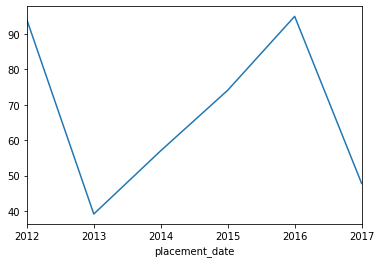

In [167]:
df.set_index('placement_date').groupby([pd.Grouper(freq='AS-OCT')])['days_solitary'].describe()['mean'].plot()

In [168]:
df['mental_illness'].unique()

array(['Mental Illness', 'None', 'Serious Mental Illness'], dtype=object)

In [169]:
df['mental_illness_bool'] = df['mental_illness'].replace({'Mental Illness': True, 'None': False, 'Serious Mental Illness': True})

In [170]:
df.groupby(['placement_reason_type', 'mental_illness_bool'])['days_solitary'].describe()

count        mean         std  \
placement_reason_type    mental_illness_bool                                  
Disciplinary             False                101.0   28.396040   29.148269   
                         True                  29.0   18.620690   17.636030   
Facility Security Threat False                 54.0   70.962963   70.566699   
                         True                  29.0   53.793103   92.280388   
Hunger Strike            False                  1.0    4.000000         NaN   
Medical                  False                  5.0   12.600000   13.164346   
                         True                   8.0    9.250000    6.341473   
Mental Illness           False                  3.0   17.000000    8.717798   
                         True                   6.0   54.000000   49.739320   
Other                    True                   3.0   23.666667   20.599353   
Pending Disciplinary     True                   8.0    6.750000    3.370036   
Protective Custody       False                 73.0  121.575342  139.403383   
                         True                  51.0   92.549020   98.026591   

                                               min   25%   50%     75%    max  
placement_reason_type    mental_illness_bool                                   
Disciplinary             False                 3.0  19.0  23.0   31.00  288.0  
                         True                  2.0   8.0  12.0   27.00   77.0  
Facility Security Threat False                17.0  32.0  43.5   91.75  449.0  
                         True                  6.0  14.0  31.0   51.00  509.0  
Hunger Strike            False                 4.0   4.0   4.0    4.00    4.0  
Medical                  False                 1.0   1.0  10.0   19.00   32.0  
                         True                  1.0   6.0   7.5   13.50   20.0  
Mental Illness           False                 7.0  14.0  21.0   22.00   23.0  
                         True                  4.0  30.0  40.0   59.75  147.0  
Other                    True                  2.0  14.0  26.0   34.50   43.0  
Pending Disciplinary     True                  2.0   4.0   7.0    8.50   12.0  
Protective Custody       False                 3.0  32.0  83.0  154.00  781.0  
                         True                  2.0  24.0  59.0  109.50  423.0

In [171]:
df.groupby(['detainee_request', 'mental_illness_bool'])['days_solitary'].describe()

count        mean         std  min  \
detainee_request   mental_illness_bool                                       
Detainee Request   False                 64.0  131.375000  145.511632  3.0   
                   True                  43.0  100.232558  101.827781  5.0   
Facility-Initiated False                173.0   42.109827   50.442514  1.0   
                   True                  91.0   33.329670   59.965926  1.0   

                                          25%   50%    75%    max  
detainee_request   mental_illness_bool                             
Detainee Request   False                34.25  88.0  160.0  781.0  
                   True                 28.50  67.0  109.5  423.0  
Facility-Initiated False                21.00  28.0   37.0  449.0  
                   True                  8.00  14.0   41.0  509.0

In [172]:
df['mental_illness_bool'].value_counts(normalize=True)

False    0.638814
True     0.361186
Name: mental_illness_bool, dtype: float64

In [173]:
df['mental_illness_bool'].value_counts()

False    237
True     134
Name: mental_illness_bool, dtype: int64

In [174]:
df[df['mental_illness_bool'] == True]['placement_reason'].value_counts(dropna=False, normalize=True)

Protective Custody: Other Detainee Safety                                0.305970
Disciplinary                                                             0.216418
Facility Security Threat: Other                                          0.104478
Facility Security Threat: Violent or Disruptive Behavior                 0.089552
Pending Investigation of Disciplinary Violation                          0.059701
Protective Custody: Gang Status (Protective Custody Only)                0.052239
Mental Illness                                                           0.044776
Medical: Observation                                                     0.044776
Other                                                                    0.022388
Facility Security Threat: Gang Member Status (Not Protective Custody)    0.022388
Protective Custody: Special Vulnerability Other                          0.014925
Medical: Other                                                           0.014925
Protective Custo

In [175]:
df[df['mental_illness_bool'] == True]['placement_reason'].value_counts(dropna=False)

Protective Custody: Other Detainee Safety                                41
Disciplinary                                                             29
Facility Security Threat: Other                                          14
Facility Security Threat: Violent or Disruptive Behavior                 12
Pending Investigation of Disciplinary Violation                           8
Protective Custody: Gang Status (Protective Custody Only)                 7
Mental Illness                                                            6
Medical: Observation                                                      6
Other                                                                     3
Facility Security Threat: Gang Member Status (Not Protective Custody)     3
Protective Custody: Special Vulnerability Other                           2
Medical: Other                                                            2
Protective Custody: Criminal Offense (i.e. Sex Offender)                  1
Name: placem

In [177]:
df['mental_illness'].value_counts()

None                      237
Mental Illness            116
Serious Mental Illness     18
Name: mental_illness, dtype: int64

In [178]:
df['ever_smi'].value_counts()

No     354
Yes     17
Name: ever_smi, dtype: int64

In [179]:
df[df['mental_illness'] == 'Serious Mental Illness']['days_solitary'].mean()

98.66666666666667

In [180]:
df[df['mental_illness'] == 'Serious Mental Illness']['placement_reason'].value_counts()

Protective Custody: Other Detainee Safety                    12
Facility Security Threat: Other                               3
Protective Custody: Gang Status (Protective Custody Only)     2
Facility Security Threat: Violent or Disruptive Behavior      1
Name: placement_reason, dtype: int64

In [181]:
df[df['mental_illness'] == 'Serious Mental Illness']['country_of_citizenship'].value_counts()

MEXICO                             11
MICRONESIA, FEDERATED STATES OF     1
ROMANIA                             1
GUATEMALA                           1
HAITI                               1
DOMINICAN REPUBLIC                  1
EL SALVADOR                         1
GAMBIA                              1
Name: country_of_citizenship, dtype: int64

### Calculating total population in solitary placements at any given time

For the period of time covered by the dataset, we count the number of people currently in solitary confinement placements on each day to present a timeline of total solitary confinement population. Note that some individuals may have already been in solitary confinement at the beginning of this timeline, so the earlier period may represent an under-count of the total population.

We can note that since early 2017, the total solitary confinement population has only briefly fallen below the overall mean population.

/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


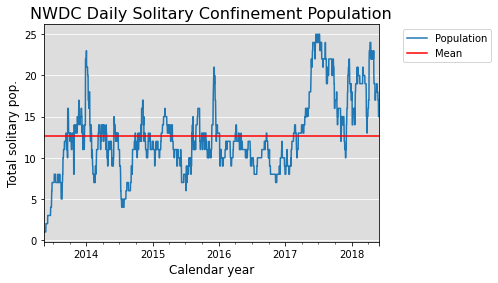

In [182]:
min_date = df['placement_date'].min()
max_date = df['release_date'].max()
timeline = pd.date_range(min_date, max_date, freq='D')
years = timeline.year.unique()

counts = pd.Series(index=timeline)
for day in timeline:
    in_range = df[(df['placement_date'] <= day) & (df['release_date'] >= day)]
    counts[day] = len(in_range)

fig, ax = plt.subplots()
fig.figsize=(10,8)

ax = counts.plot();
ax.axhline(counts.mean(), color='r')
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')
plt.title('NWDC Daily Solitary Confinement Population', fontsize=16)
plt.xlabel('Calendar year', fontsize=12)
plt.ylabel('Total solitary pop.', fontsize=12)
leg = ax.legend(('Population', 'Mean'), loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()
# fig.savefig('samplefigure', bbox_inches='tight')

In [183]:
counts.resample('AS-OCT').mean()

2012-10-01     6.929078
2013-10-01    11.468493
2014-10-01    11.652055
2015-10-01    11.401639
2016-10-01    15.136986
2017-10-01    17.666667
Freq: AS-OCT, dtype: float64

In [184]:
counts.mean()

12.686720867208672

We can also visualize this data at higher resolution by plotting each year separately, and superimposing lines for yearly average population:

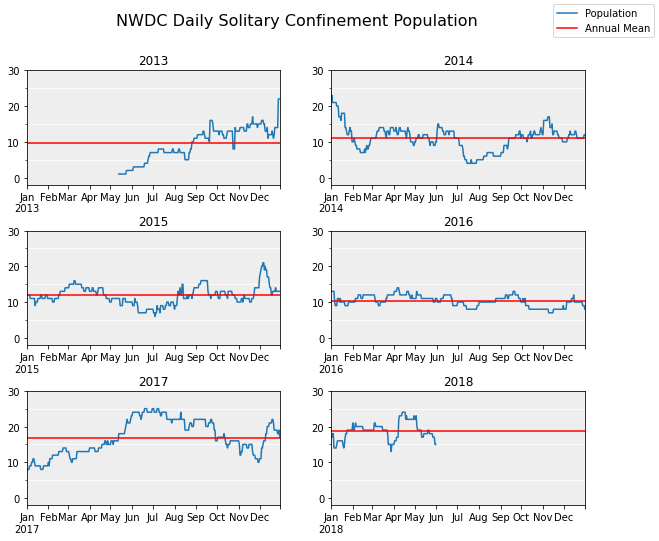

In [185]:
fig = plt.figure(figsize=(10,8))
i = 0
for year in years:
    ax=plt.subplot(3,2,i+1)

    ax.set_title(f'{year}')
    counts[f'{year}'].plot(ax=ax)
    datemin = pd.Timestamp(f'{year}-01-01')
    datemax = pd.Timestamp(f'{year}-12-31')
    ax.set_facecolor('#EEEEEE')
    ax.set_xlim([datemin, datemax])
    ax.set_ylim([-2,30])
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(NullLocator())
    ax.axhline(counts[f'{year}'].mean(), color='r')
    i = i + 1
    plt.grid(axis='y', which='minor', color='#FFFFFF')
plt.subplots_adjust(wspace=.2, hspace=.4)
fig.suptitle("NWDC Daily Solitary Confinement Population", fontsize=16)
fig.legend(('Population', 'Annual Mean'), loc='upper right')
plt.show()

While limitations of the dataset may cause an underestimate of the total population during the early period of the dataset, we see clearly that the average population in solitary is between 9 to 12 during 2013-2016, rising to an average of nearly 17 during 2017, and an average of more than 18 people in solitary time during the first five months of 2018.

In [186]:
day = '2018-05-25'
in_range = df[(df['placement_date'] <= day) & (df['release_date'] >= day)]

In [187]:
in_range[in_range['country_of_citizenship'] == 'EL SALVADOR']

,tracking_number,gender,country_of_citizenship,facility_aor,facility,facility:detloc,report_type,placement_date,placement_reason,release_date,...,lgbti,item_type,placement_reason_type,admin_or_disciplinary,detloc,solitary_length,days_solitary,log_days_solitary,placement_year,mental_illness_bool
64,10233,Male,EL SALVADOR,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2017-08-29,Facility Security Threat: Violent or Disruptiv...,2018-05-31,...,NaN,Item,Facility Security Threat,Administrative,CSCNWWA,275 days,275.0,5.616771,2017,False


## National solitary confinement datasets

### ICIJ

See: ["Solitary Voices: Thousands of Immigrants Suffer In US Solitary Confinement"](https://www.icij.org/investigations/solitary-voices/thousands-of-immigrants-suffer-in-us-solitary-confinement/) by Spencer Woodman Karrie Kehoe Maryam Saleh Hannah Rappleye, International Consortium of Investigative Journalists, May 21, 2019 

See notebook `icij.ipynb` for writeup on apparent issues with `placement_date` and `release_date` values in the published version of this dataset. Correcting for this issue shows that ICIJ and UWCHR's respective datasets for NWDC solitary confinement placements are very similar, though some discrepancies remain.

### POGO

See: POGO, ["ISOLATED: ICE Confines Some Detainees with Mental Illness in Solitary for Months"](https://www.pogo.org/investigation/2019/08/isolated-ice-confines-some-detainees-with-mental-illness-in-solitary-for-months/), August 14 2019

See notebook `pogo.ipynb` for descriptive analysis of POGO dataset including comparison with UWCHR records. Records published by POGO match recods released to UWCHR.

In [188]:
icij = pd.read_csv('../input/icij.csv.gz',
                   parse_dates=['placement_date', 'release_date'],
                   **csv_opts)

# icij = pd.read_csv('../frozen/icij-date-fix-temp.csv',
#                    parse_dates=['placement_date',
#                                 'release_date',
#                                 'placement_date_fixed',
#                                 'release_date_fixed'],
#                    **csv_opts)

pogo = pd.read_csv('../input/pogo.csv.gz',
                   parse_dates=['placement_date', 'release_date'],
                   **csv_opts)

In [189]:
# pogo = pogo[pd.notnull(pogo['days_solitary'])]
# pogo = pogo[pogo['days_solitary'] > 0]

In [190]:
print(icij.info())
print()
icij.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8488 entries, 0 to 8487
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   record_id              8488 non-null   int64         
 1   citizenship            8488 non-null   object        
 2   citizenship_id         8488 non-null   object        
 3   facility_aor           8487 non-null   object        
 4   state                  8488 non-null   object        
 5   facility               8488 non-null   object        
 6   facility_id            8488 non-null   object        
 7   placement_date         8488 non-null   datetime64[ns]
 8   year                   8488 non-null   int64         
 9   placement_reason       8488 non-null   object        
 10  placement_reason_raw   8488 non-null   object        
 11  release_date           8293 non-null   datetime64[ns]
 12  days_solitary          8293 non-null   float64       
 13  men

,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch,placement_reason_type,admin_or_disciplinary,detloc
0,1,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,2012-04-30,2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,2013-06-27,423.0,no,no,Protective Custody,Administrative,EAZ
1,2,Sierra Leone,sierra_leone,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,2012-05-30,2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,2013-10-30,518.0,no,no,Protective Custody,Administrative,HENDENV
2,3,El Salvador,el_salvador,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,2012-07-12,2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,2013-03-07,208.0,no,no,Protective Custody,Administrative,HENDENV
3,4,Iraq,iraq,SND (San Diego),CA,CA - San Diego Contract Detention Facility - C...,san_diego_contract_detention_facility_cca_otay_ca,2012-07-25,2012,Mental Illness,mental_illness,2013-11-13,476.0,yes,no,Mental Illness,Administrative,CCASDCA
4,5,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,2012-08-17,2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,2013-08-11,448.0,no,no,Protective Custody,Administrative,EAZ


In [191]:
icij['facility'] = icij['facility'].str.strip()

In [192]:
adelanto = icij[icij['facility'] == 'CA - Adelanto Correctional Facility']

In [193]:
icij_nwdc_str = icij[icij['state'] == 'WA']['facility'].unique()[0]

In [194]:
icij_nwdc_str

'WA - Northwest Detention Center'

In [195]:
icij_nwdc = icij[icij['facility'] == icij_nwdc_str]

In [196]:
icij_nwdc_count = len(icij_nwdc)
icij_nwdc_max_date = icij_nwdc['placement_date'].max()
icij_nwdc_min_date = icij_nwdc['placement_date'].min()
print(icij_nwdc_min_date, icij_nwdc_max_date)

2013-03-06 00:00:00 2017-10-01 00:00:00


In [197]:
print(pogo.info())
print()
pogo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   gender                     6559 non-null   object        
 1   facility_aor               6559 non-null   object        
 2   facility                   6559 non-null   object        
 3   report_type                6559 non-null   object        
 4   placement_date             6559 non-null   datetime64[ns]
 5   placement_reason           6559 non-null   object        
 6   release_date               6439 non-null   datetime64[ns]
 7   disciplinary_infraction    3066 non-null   object        
 8   detailed_reason            901 non-null    object        
 9   attorney_of_record         5819 non-null   object        
 10  attorney_notification      5820 non-null   object        
 11  detainee_request           6559 non-null   object        
 12  compli

,gender,facility_aor,facility,report_type,placement_date,placement_reason,release_date,disciplinary_infraction,detailed_reason,attorney_of_record,...,mental_illness,serious_medical_illness,serious_disability,smi_spi_dis_description,fo_recommendation,created,days_solitary,placement_reason_type,admin_or_disciplinary,detloc
0,Male,BUF (Buffalo),BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),30 Day Interval,2016-03-04,Protective Custody: Other Detainee Safety,2018-05-03,NaN,NaN,No,...,None,No,No,NaN,SHU,3/18/2016 6:18,790.0,Protective Custody,Administrative,BTV
1,Male,DET (Detroit),SENECA COUNTY JAIL (OH),30 Day Interval,2016-05-26,Protective Custody: Criminal Offense (i.e. Sex...,2018-01-03,NaN,Detainee continues to demonstrate inability to...,No,...,None,No,No,NaN,FO concurs with placement. There have been no...,6/27/2016 12:24,587.0,Protective Custody,Administrative,SENECOH
2,Male,SND (San Diego),OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA),30 Day Interval,2016-06-18,Protective Custody: Other Detainee Safety,2017-12-04,NaN,"PC- Active 6,(b)7c Gang member. Unsafe in GP",No,...,None,No,No,NaN,The Field Office Director Designee is actively...,5/9/2016 9:25,534.0,Protective Custody,Administrative,CCASDCA
3,Male,SND (San Diego),IMPERIAL REGIONAL DETENTION FACILITY (CA),30 Day Interval,2016-01-02,Protective Custody: Gang Status (Protective Cu...,2017-04-12,NaN,NaN,No,...,None,No,No,NaN,NaN,1/22/2016 16:58,466.0,Protective Custody,Administrative,IRADFCA
4,Female,LOS (Los Angeles),ADELANTO ICE PROCESSING CENTER (CA),30 Day Interval,2016-09-13,Protective Custody: Other Detainee Safety,2017-12-11,NaN,"On September 13, 2016, 6,(b)7c was placed in s...",NaN,...,Mental Illness,No,No,"Per facility psychologist, 6,(b)7c was diagnos...",Alternative housing arrangements are being exp...,9/27/2016 9:19,454.0,Protective Custody,Administrative,ADLNTCA


In [198]:
pogo['record_id'] = range(len(pogo))
pogo = pogo.rename({'length_of_solitary_confinement_(pogo_calculation)': 'days_solitary'}, axis=1)

In [199]:
pogo['days_solitary'].min()

0.0

In [200]:
pogo_nwdc_str = 'TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)'
pogo_nwdc = pogo[pogo['facility'] == pogo_nwdc_str]

In [201]:
pogo_nwdc_count = len(pogo_nwdc)
pogo_nwdc_max_date = pogo_nwdc['placement_date'].max()
pogo_nwdc_min_date = pogo_nwdc['placement_date'].min()
print(pogo_nwdc_min_date, pogo_nwdc_max_date, pogo_nwdc_count)

2016-01-10 00:00:00 2018-05-03 00:00:00 149


### OIG report

OIG-17-119 [ICE Field Offices Need to Improve Compliance with Oversight Requirements for Segregation of Detainees with Mental Health Conditions](https://www.oig.dhs.gov/sites/default/files/assets/2017-11/OIG-17-119-Sep17.pdf) (September 29, 2017)

"Using this SRMS [Segregation Review Management System] data from fiscal year 2015 and other factors such as prior inspection reports, we selected seven facilities to visit and review judgmental samples of instances in which detainees with mental health conditions were held in segregation. We visited the Buffalo Federal Detention Facility (a service processing center) in New York; two contract detention centers, the Northwest Detention Facility in Washington and the South Texas Detention Complex in Texas; and four Intergovernmental Service Agreement facilities, the Adelanto Detention Center in California, Baker County Sheriff’s Office in Florida, Tri-County Detention Center in Illinois, and York County Prison in Pennsylvania. [...]"

"We also analyzed SRMS data from October 1, 2015, to June 30, 2016, which showed 713 segregation placements for detainees with mental health conditions — 272 disciplinary instances and 441 administrative instances. Some detainees were segregated multiple times. From the 713 segregation placements in this time period that were in SRMS, we selected and reviewed a judgmental sample of 189 instances of segregation involving 127 detainees with mental health conditions."

Below we try to replicate this using POGO dataset in order to test whether this data is drawn from SRMS. Results are inconclusive but numbers of reported segregation placements are not very close, even when using broadest interpretation of OIG methodology (i.e. all placements with mental illness flag nationwide during specified timeframe).


In [202]:
oig_sample = ['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)',
'BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY)',
'SOUTH TEXAS ICE PROCESSING CENTER (TX)',
'ADELANTO ICE PROCESSING CENTER (CA)',
"BAKER COUNTY SHERIFF'S OFFICE (FL)",
'YORK COUNTY PRISON (PA)',
'TRI-COUNTY DETENTION CENTER (IL)']

In [203]:
oig_frame_start = '2015-10-01'
oig_frame_end = '2016-06-30'

In [204]:
len(pogo[pogo['facility'].isin(oig_sample)].set_index('placement_date')[oig_frame_start:oig_frame_end])

385

In [205]:
len(pogo[pogo['facility'].isin(oig_sample)])

2252

In [206]:
len(pogo.set_index('placement_date')[oig_frame_start:oig_frame_end])

1254

In [207]:
oig_frame = pogo.set_index('placement_date')[oig_frame_start:oig_frame_end]

In [208]:
mental_illness_true = ['Yes', 'Mental Illness', 'Serious Mental Illness']

In [209]:
# All nationwide mental illness flags during OIG sampple frame
sum(oig_frame['mental_illness'].isin(mental_illness_true))

511

In [210]:
pogo['mental_illness'].value_counts(dropna=False).index

Index(['None', 'Mental Illness', 'Serious Mental Illness', nan], dtype='object')

In [211]:
# Mental illness flags for OIG selected facilities during OIG sampple frame
sum(pogo[pogo['facility'].isin(oig_sample)].set_index('placement_date')[oig_frame_start:oig_frame_end]['mental_illness'].isin(mental_illness_true))

246

### ICIJ: NWDC use of solitary confinement in comparison with other ICE detention facilities

The dataset published by ICIJ includes 272 solitary confinement placements at NWDC between March 2013 to October 2017, placing NWDC at #9 among 111 ICE facilities ranked by number of solitary placements. The average length of solitary stay is almost 52 days (rank #10), median solitary stay is 27 days (rank #24).

In [212]:
avg_days = icij.groupby('facility')['days_solitary'].mean().sort_values(ascending=False)
avg_days.name = 'mean_days_solitary'
avg_days = avg_days.reset_index()
avg_days['rank'] = avg_days.index + 1
avg_days.set_index('rank', inplace=True)
avg_days.head(10)

,facility,mean_days_solitary
rank,,
1,CA - Sacramento County Jail-rio Cosumnes Corr....,83.567010
2,CA - Imperial Regional Detention Facility,81.000000
3,TX - El Paso Service Processing Center,78.553571
4,CA - California City Correctional Center,68.181818
5,CA - Yuba County Jail,67.735632
6,NV - Henderson Detention Center,61.462766
7,KY - Boone County Jail,61.000000
8,NV - Washoe County Jail,61.000000
9,GA - Atlanta City Detention Center,55.250000


In [213]:
median_days = icij.groupby('facility')['days_solitary'].median().sort_values(ascending=False)
median_days.name = 'median_days_solitary'
median_days = median_days.reset_index()
median_days['rank'] = median_days.index + 1
median_days.set_index('rank', inplace=True)
median_days[median_days['facility'] == icij_nwdc_str]

,facility,median_days_solitary
rank,,
24,WA - Northwest Detention Center,27.0


In [214]:
placement_count = icij.groupby('facility')['record_id'].count().sort_values(ascending=False)
placement_count.name = 'solitary_placements'
placement_count = placement_count.reset_index()
placement_count['rank'] = placement_count.index + 1
placement_count.set_index('rank', inplace=True)
placement_count.head(10)

,facility,solitary_placements
rank,,
1,CA - Adelanto Correctional Facility,1256
2,GA - Stewart Detention Center,616
3,CA - San Diego Contract Detention Facility - C...,427
4,PA - York County Prison,423
5,TX - Houston Contract Detention Facility,408
6,AZ - Eloy Federal Contract Facility,358
7,LA - Jena/lasalle Detention Facility,341
8,TX - South Texas Detention Complex,326
9,WA - Northwest Detention Center,272


### POGO: NWDC use of solitary confinement in comparison with other ICE detention facilities

The dataset published by POGO includes 149 solitary confinement placements at NWDC from January 1, 2016 to May 3, 2018, placing NWDC at #13 among 99 ICE facilities ranked by number of solitary placements. The average length of solitary stay is almost 70 days (rank #2), median solitary stay is 42 days (rank #6). For both measures of length of stay, NWDC has the longest stays among federal detention centers.

In [215]:
pogo['days_solitary'].describe()

count    6439.000000
mean       30.195683
std        41.259680
min         0.000000
25%         9.000000
50%        20.000000
75%        32.000000
max       790.000000
Name: days_solitary, dtype: float64

In [216]:
sum(pogo['days_solitary'] > 14)

4197

In [217]:
sum(pogo['days_solitary'] > 14) / len(pogo)

0.6398841286781521

In [218]:
pogo_over_14 = pogo[pogo['days_solitary'] > 14]

In [219]:
pogo.groupby('facility')['record_id'].count().rank(ascending=False)[pogo_nwdc_str]

13.0

In [220]:
pogo.groupby('facility')['days_solitary'].median().rank(ascending=False, method='min')[pogo_nwdc_str]

6.0

In [221]:
pogo.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
facility,,,,,,,,
BUTLER COUNTY JAIL (KS),2.0,74.000000,24.041631,57.0,65.50,74.0,82.5,91.0
TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA),139.0,69.884892,72.575506,2.0,22.50,42.0,94.5,391.0
UTAH COUNTY JAIL (UT),9.0,67.111111,57.184885,3.0,16.00,68.0,105.0,172.0
YUBA COUNTY JAIL (CA),58.0,65.431034,81.500858,1.0,18.50,32.0,73.5,413.0
NORTHERN OREGON CORRECTIONAL FACILITY (OR),4.0,60.750000,76.691481,10.0,24.25,29.0,65.5,175.0
BOONE COUNTY JAIL (KY),1.0,57.000000,NaN,57.0,57.00,57.0,57.0,57.0
WORCESTER COUNTY JAIL (MD),10.0,56.000000,28.307832,22.0,32.25,52.0,81.0,97.0
ATLANTA CITY DETENTION CENTER (GA),35.0,53.942857,72.966932,3.0,16.00,24.0,60.5,352.0
RIO COSUMNES CORR. CENTER (CA),40.0,52.650000,46.259885,4.0,19.75,33.5,66.0,167.0


In [222]:
pogo_over_14.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
facility,,,,,,,,
UTAH COUNTY JAIL (UT),7.0,84.857143,52.014192,16.0,55.50,70.0,112.50,172.0
TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA),120.0,79.625000,73.521970,15.0,28.75,51.0,102.00,391.0
NORTHERN OREGON CORRECTIONAL FACILITY (OR),3.0,77.666667,84.293139,29.0,29.00,29.0,102.00,175.0
YUBA COUNTY JAIL (CA),49.0,76.061224,84.508236,16.0,25.00,39.0,77.00,413.0
BUTLER COUNTY JAIL (KS),2.0,74.000000,24.041631,57.0,65.50,74.0,82.50,91.0
SENECA COUNTY JAIL (OH),18.0,70.444444,132.241411,16.0,22.00,29.0,49.75,587.0
ATLANTA CITY DETENTION CENTER (GA),26.0,69.807692,78.851769,18.0,23.25,43.5,79.25,352.0
BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),72.0,61.902778,95.335606,15.0,25.00,37.0,69.00,790.0
EL PASO SERVICE PROCESSING CENTER (TX),38.0,59.473684,52.028442,18.0,25.50,45.5,68.00,242.0


In [223]:
dedicated = ['ADLNTCA',
             'BTV',
             'CACFMES',
             'CCANOOH',
             'CCASDCA',
             'CSCNWWA',
             'DENICDF',
             'EAZ',
             'ELZICDF',
             'EPC',
             'FLO',
             'FRMVLVA',
             'HOUICDF',
             'IRADFCA',
             'JAMESGA',
             'JENADLA',
             'KRO',
             'OTRPCNM',
             'PIC',
             'PINEPLA',
             'PRLDCTX',
             'STCDFTX',
             'STWRTGA',
             'WCCPBFL'
             ]

In [230]:
data = pogo[pogo['detloc'].isin(dedicated)]

In [231]:
data = data.groupby('facility')['days_solitary'].describe().sort_values(by='count', ascending=False).head(15)

In [232]:
data = data.sort_values(by='count')

In [233]:
edit_labels = pd.Series(data.index + ' - ' + data['count'].astype(int).astype(str))

In [234]:
edit_labels.values

array(['DENVER CONTRACT DETENTION FACILITY (CO) - 69',
       'FLORENCE SERVICE PROCESSING CENTER (AZ) - 78',
       'IMPERIAL REGIONAL DETENTION FACILITY (CA) - 108',
       'TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA) - 139',
       'KROME NORTH SERVICE PROCESSING CENTER (FL) - 153',
       'PINE PRAIRIE ICE PROCESSING CENTER (LA) - 162',
       'IMMIGRATION CENTERS OF AMERICA FARMVILLE (VA) - 197',
       'BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY) - 232',
       'LASALLE ICE PROCESSING CENTER (JENA) (LA) - 239',
       'ELOY FEDERAL CONTRACT FACILITY (AZ) - 258',
       'HOUSTON CONTRACT DETENTION FACILITY (TX) - 280',
       'SOUTH TEXAS ICE PROCESSING CENTER (TX) - 287',
       'OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA) - 297',
       'STEWART DETENTION CENTER (GA) - 610',
       'ADELANTO ICE PROCESSING CENTER (CA) - 1167'], dtype=object)

In [235]:
cm.viridis(0,1)

(0.267004, 0.004874, 0.329415, 1.0)

In [236]:
target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']
target['mean']

69.88489208633094

In [237]:
pogo['placement_date'].max()

Timestamp('2018-05-04 00:00:00')

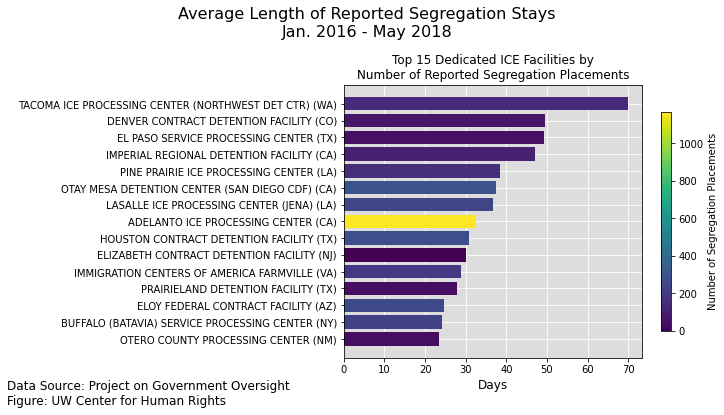

In [241]:
target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']

fig, ax = plt.subplots(figsize=(10,5))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

y_pos = np.arange(len(data))

plt.barh(y_pos, data['mean'], align='center', color=cm.viridis((data['count']/data['count'].max())))

plt.yticks(y_pos, data.index)

plt.xlabel('Days', fontsize=12)

title = 'Average Length of Reported Segregation Stays\nJan. 2016 - May 2018'

plt.suptitle(title, fontsize=16, y = 1.1)
plt.title('Top 15 Dedicated ICE Facilities by\nNumber of Reported Segregation Placements')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = 0, vmax=data['count'].max()))
sm._A = []
plt.colorbar(sm, shrink=.8, label='Number of Segregation Placements')

txt='Data Source: Project on Government Oversight\nFigure: UW Center for Human Rights'
plt.figtext(0, 0, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.tight_layout()
plt.show();

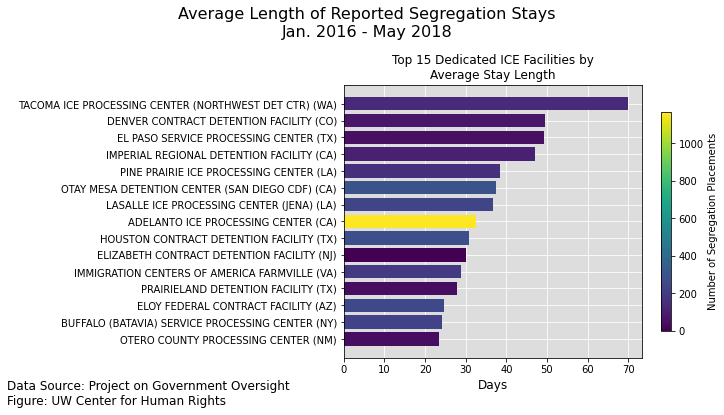

In [242]:
data = pogo[pogo['detloc'].isin(dedicated)]

data = data.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False).head(15)

data = data.sort_values(by='mean')

# edit_labels = pd.Series(data.index + ' - ' + data['count'].astype(int).astype(str))

# edit_labels.values

cm.viridis(0,1)

target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']
target['mean']

pogo['placement_date'].max()

target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']

fig, ax = plt.subplots(figsize=(10,5))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

y_pos = np.arange(len(data))

plt.barh(y_pos, data['mean'], align='center', color=cm.viridis((data['count']/data['count'].max())))

plt.yticks(y_pos, data.index)

plt.xlabel('Days', fontsize=12)

title = 'Average Length of Reported Segregation Stays\nJan. 2016 - May 2018'

plt.suptitle(title, fontsize=16, y = 1.1)
plt.title('Top 15 Dedicated ICE Facilities by\nAverage Stay Length')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = 0, vmax=data['count'].max()))
sm._A = []
plt.colorbar(sm, shrink=.8, label='Number of Segregation Placements')

txt='Data Source: Project on Government Oversight\nFigure: UW Center for Human Rights'
plt.figtext(0, 0, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.tight_layout()
plt.show();

In [243]:
data = pogo.groupby('facility')['days_solitary'].describe().sort_values(by='count', ascending=False)

In [244]:
# data.index

In [245]:
to_label = data.head(15).index

In [246]:
pos = range(1250, 0, -75)

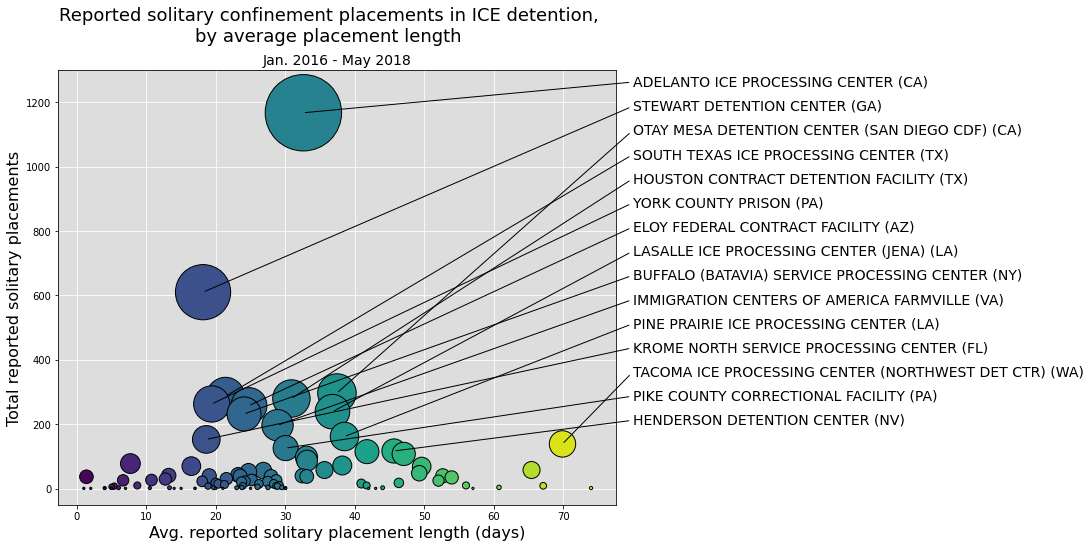

In [247]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

fig = plt.scatter(data['mean'], data['count'], s=data['count']*5,
                  color=cm.viridis((data['mean']/data['mean'].max())),
                  edgecolor={'#000000'})
ax.set_ylim(-50,1300)

for i, txt in enumerate(to_label):
    x = data.loc[txt, 'mean']
    y = data.loc[txt, 'count']
    plt.annotate(txt, (x, y), xytext=(80, pos[i]),
                 fontsize=14,
                 arrowprops={'arrowstyle': '-', 'relpos': (.0,.5)},
                 annotation_clip=False)

plt.xlabel('Avg. reported solitary placement length (days)', fontsize=16)
plt.ylabel('Total reported solitary placements', fontsize=16)
plt.suptitle('Reported solitary confinement placements in ICE detention,\nby average placement length', y=.99, fontsize=18)
plt.title('Jan. 2016 - May 2018', fontsize=14)

plt.show();

In [248]:
pogo['placement_date'].max()

Timestamp('2018-05-04 00:00:00')

In [249]:
avg_days = pogo.groupby('facility')['days_solitary'].mean().sort_values(ascending=False)
avg_days.name = 'mean_days_solitary'
avg_days = avg_days.reset_index()
avg_days['rank'] = avg_days.index + 1
avg_days.set_index('rank', inplace=True)
avg_days.head(10)

,facility,mean_days_solitary
rank,,
1,BUTLER COUNTY JAIL (KS),74.000000
2,TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,69.884892
3,UTAH COUNTY JAIL (UT),67.111111
4,YUBA COUNTY JAIL (CA),65.431034
5,NORTHERN OREGON CORRECTIONAL FACILITY (OR),60.750000
6,BOONE COUNTY JAIL (KY),57.000000
7,WORCESTER COUNTY JAIL (MD),56.000000
8,ATLANTA CITY DETENTION CENTER (GA),53.942857
9,RIO COSUMNES CORR. CENTER (CA),52.650000


In [250]:
median_days = pogo.groupby('facility')['days_solitary'].median().sort_values(ascending=False)
median_days.name = 'median_days_solitary'
median_days = median_days.reset_index()
median_days['rank'] = median_days.index + 1
median_days.set_index('rank', inplace=True)
median_days[median_days['facility'] == pogo_nwdc_str]
median_days.head(10)

,facility,median_days_solitary
rank,,
1,BUTLER COUNTY JAIL (KS),74.0
2,UTAH COUNTY JAIL (UT),68.0
3,BOONE COUNTY JAIL (KY),57.0
4,WORCESTER COUNTY JAIL (MD),52.0
5,CHASE COUNTY DETENTION FACILITY (KS),43.0
6,TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,42.0
7,HONOLULU FEDERAL DETENTION CENTER (HI),42.0
8,JOHNSON COUNTY CORRECTIONS CENTER (TX),39.5
9,VIRGINIA PENINSULA REGIONAL JAIL (VA),34.5


In [251]:
placement_count = pogo.groupby('facility')['record_id'].count().sort_values(ascending=False)
placement_count.name = 'solitary_placements'
placement_count = placement_count.reset_index()
placement_count['rank'] = placement_count.index + 1
placement_count.set_index('rank', inplace=True)
placement_count[placement_count['facility'] == pogo_nwdc_str]

,facility,solitary_placements
rank,,
13,TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,149


/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


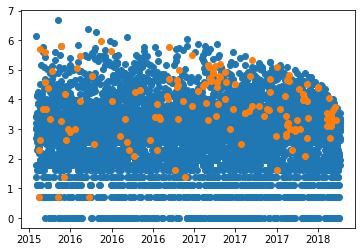

In [252]:
pogo_nwdc_mask = pogo.set_index('placement_date')['facility'] == pogo_nwdc_str
pogo_nwdc = pogo.set_index('placement_date').loc[pogo_nwdc_mask, 'days_solitary'].dropna()
pogo_not_nwdc = pogo.set_index('placement_date').loc[~pogo_nwdc_mask, 'days_solitary'].dropna()

x=pogo_not_nwdc.index.astype(int)
y=np.log(pogo_not_nwdc.values)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y)

x=pogo_nwdc.index.astype(int)
y=np.log(pogo_nwdc.values)
plt.scatter(x, y)

xticks = ax.get_xticks()
xticks_dates = [pd.to_datetime(x).year for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.show()
plt.close(fig=fig)
del fig, ax

In [253]:
import scipy.stats as scipystats

In [254]:
nwdc = pogo['facility'] == pogo_nwdc_str

In [255]:
# This statistical analysis section is speculative

In [256]:
ttest = scipystats.ttest_ind(pogo[nwdc]['days_solitary'], pogo[~nwdc]['days_solitary'], nan_policy='omit')

In [257]:
ttest

Ttest_indResult(statistic=11.583479295015536, pvalue=1.0063156165482894e-30)

In [258]:
avg_sol = pogo.groupby('detloc')['days_solitary'].mean()

In [259]:
avg_sol_fy = pogo.set_index('placement_date').groupby([pd.Grouper(freq='AS-OCT'),'detloc'])['days_solitary'].mean()

In [260]:
avg_sol_fy.unstack().T.loc['CSCNWWA']

placement_date
2015-10-01    87.484848
2016-10-01    82.607143
2017-10-01    44.020000
Freq: AS-OCT, Name: CSCNWWA, dtype: float64

In [261]:
target_facil = 'CSCNWWA'

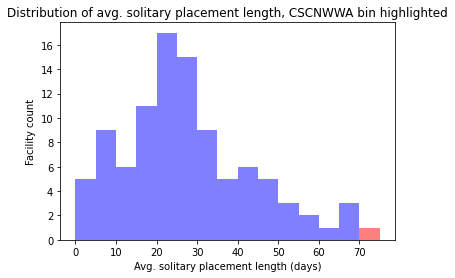

In [262]:
num_bins = np.arange(0,80,5)
data = avg_sol
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)

target_bin = np.digitize(avg_sol[target_facil], list(bins))

patches[target_bin].set_fc('r')

plt.xlabel('Avg. solitary placement length (days)')
plt.ylabel('Facility count')
plt.title(f'Distribution of avg. solitary placement length, {target_facil} bin highlighted')

plt.show;

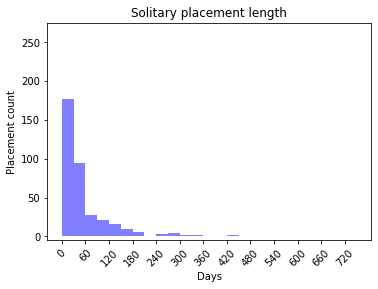

In [263]:
num_bins = np.arange(0,780,30)
data = df['days_solitary']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('Days')
plt.xticks(np.arange(0, 780, step=60), rotation=45)
plt.ylabel('Placement count')
plt.yticks(np.arange(0, 300, step=50))
plt.ylim(-5, 275)
plt.title('Solitary placement length')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

### Placement reasons

### Solitary length by Placement Reason

Placement reasons are uniform categories used by all three datasets (UWCHR, ICIJ, POGO).

In [264]:
set(df['placement_reason']).union(set(pogo['placement_reason'])).union(set(icij['placement_reason']))

{'Disciplinary',
 'Facility Security Threat: Due to Seriousness of Criminal Conviction',
 'Facility Security Threat: Gang Member Status (Not Protective Custody)',
 'Facility Security Threat: Other',
 'Facility Security Threat: Violent or Disruptive Behavior',
 'Hunger Strike',
 'Medical: Detox/Withdrawal Observation',
 'Medical: Disabled or Infirm',
 'Medical: Observation',
 'Medical: Other',
 'Medical: Other Infectious Disease',
 'Medical: Segregation Unit',
 'Medical: Tuberculosis',
 'Mental Illness',
 'Mental Illness: Observation',
 'Other',
 'Pending Investigation of Disciplinary Violation',
 'Protective Custody: Criminal Offense',
 'Protective Custody: Criminal Offense (i.e. Sex Offender)',
 'Protective Custody: Gang Status (Protective Custody Only)',
 'Protective Custody: Lesbian, Gay, Bisexual, Transgender (LGBT)',
 'Protective Custody: Other Detainee Safety',
 'Protective Custody: Special Vulnerability Other',
 'Protective Custody: Victim of Sexual Assault',
 'Suicide Risk Plac

In [265]:
placement_counts = df['placement_reason'].value_counts(dropna=False)
placement_mean_days = df.groupby(['placement_reason'])['days_solitary'].mean()
placements = pd.concat([placement_counts, placement_mean_days], axis=1, sort=False)
placements = placements.rename({'placement_reason': 'Total placements',
    'days_solitary': 'Avg. solitary length'}, axis=1)
placements.index.name = 'Solitary Placement Reason'
placements

,Total placements,Avg. solitary length
Solitary Placement Reason,,
Disciplinary,130,26.215385
Protective Custody: Other Detainee Safety,87,94.045977
Facility Security Threat: Other,37,54.216216
Facility Security Threat: Violent or Disruptive Behavior,25,79.360000
Protective Custody: Gang Status (Protective Custody Only),25,138.920000
Facility Security Threat: Gang Member Status (Not Protective Custody),19,68.526316
Mental Illness,9,41.666667
Medical: Observation,9,8.777778
Pending Investigation of Disciplinary Violation,8,6.750000


Here we simplify placement reasons into broader groups for easier comparative analysis between dataests. We note that no "Suicide Risk Placement" records are associated with NWDC in any of the datasets, but all the other categories are present.

In [266]:
# Simplify placement reasons into more general categories:
with open(f'../hand/placement-types.yaml', 'r') as yamlfile:
    placement_reason_type = yaml.load(yamlfile)

In [267]:
df['placement_reason_type'] = df['placement_reason'].replace(placement_reason_type)

In [268]:
order = df.groupby(by=["placement_reason_type"])["log_days_solitary"].median().sort_values(ascending=False).index

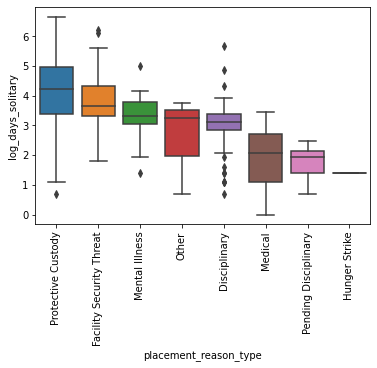

In [269]:
ax = sns.boxplot(data=df, x="placement_reason_type", y="log_days_solitary", order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [270]:
df['placement_reason_type'] = df['placement_reason_type'].astype('category')

In [271]:
df['placement_date_int'] = df['placement_date'].astype(int)

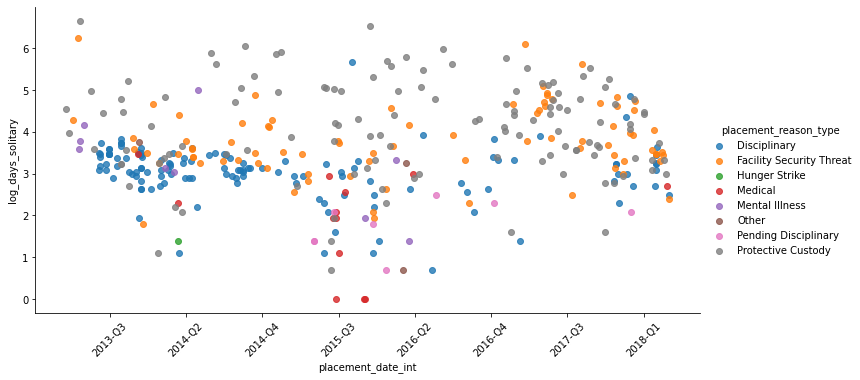

In [272]:
# x=df.loc[:, 'placement_date'].astype(int)
# y=df.loc[:,'log_days_solitary']

lm = sns.lmplot(data=df, x='placement_date_int', y='log_days_solitary', hue='placement_reason_type', height=5,
               aspect=2, fit_reg=False)

ax = lm.axes

xticks = ax[0,0].get_xticks()
xticks_dates = [str(f'{pd.to_datetime(x).year}-Q{pd.to_datetime(x).quarter}') for x in xticks]
ax = ax[0,0].set_xticklabels(xticks_dates, rotation=45)

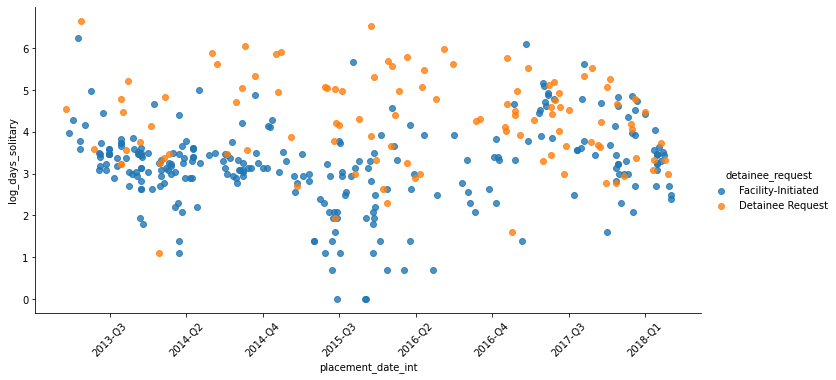

In [273]:
# x=df.loc[:, 'placement_date'].astype(int)
# y=df.loc[:,'log_days_solitary']

lm = sns.lmplot(data=df, x='placement_date_int', y='log_days_solitary', hue='detainee_request', height=5,
               aspect=2, fit_reg=False)

ax = lm.axes

xticks = ax[0,0].get_xticks()
xticks_dates = [str(f'{pd.to_datetime(x).year}-Q{pd.to_datetime(x).quarter}') for x in xticks]
ax[0,0].set_xticklabels(xticks_dates, rotation=45);

In [274]:
icij['placement_reason_type'] = icij['placement_reason'].replace(placement_reason_type)
pogo['placement_reason_type'] = pogo['placement_reason'].replace(placement_reason_type)

In [275]:
icij['nwdc'] = icij['facility'] == icij_nwdc_str
pogo['nwdc'] = pogo['facility'] == pogo_nwdc_str

In [276]:
icij.groupby(by=['nwdc',"placement_reason_type"])["days_solitary"].describe()

count        mean         std  min   25%  \
nwdc  placement_reason_type                                                 
False Disciplinary              3379.0   24.463451   19.852611  0.0  15.0   
      Facility Security Threat   770.0   48.596104   52.185193  0.0  18.0   
      Hunger Strike              181.0    6.121547    5.582376  0.0   3.0   
      Medical                    605.0    9.682645   12.539016  0.0   2.0   
      Mental Illness             317.0   38.233438   70.417083  0.0   7.0   
      Other                       75.0   33.133333   35.165375  1.0  14.0   
      Pending Disciplinary       418.0   10.021531   35.594398  0.0   3.0   
      Protective Custody        1916.0   57.541754   73.561206  0.0  15.0   
      Suicide Risk Placement     372.0    4.637097    6.323278  0.0   1.0   
True  Disciplinary               113.0   25.230088   26.856433  2.0  17.0   
      Facility Security Threat    46.0   50.630435   74.010918  6.0  26.0   
      Hunger Strike                1.0    4.000000         NaN  4.0   4.0   
      Medical                     12.0   10.166667    9.475647  1.0   2.5   
      Mental Illness               9.0   41.666667   43.674936  4.0  21.0   
      Other                        3.0   23.666667   20.599353  2.0  14.0   
      Pending Disciplinary         7.0    6.571429    3.598942  2.0   4.0   
      Protective Custody          69.0  111.695652  132.006273  2.0  26.0   

                                 50%     75%    max  
nwdc  placement_reason_type                          
False Disciplinary              21.0   29.00  440.0  
      Facility Security Threat  32.0   61.75  488.0  
      Hunger Strike              4.0    8.00   41.0  
      Medical                    6.0   14.00  142.0  
      Mental Illness            14.0   37.00  655.0  
      Other                     24.0   45.00  247.0  
      Pending Disciplinary       4.0    8.00  545.0  
      Protective Custody        31.0   68.00  747.0  
      Suicide Risk Placement     3.0    6.00   63.0  
True  Disciplinary              22.0   30.00  288.0  
      Facility Security Threat  33.0   50.00  509.0  
      Hunger Strike              4.0    4.00    4.0  
      Medical                    7.5   14.50   32.0  
      Mental Illness            28.0   44.00  147.0  
      Other                     26.0   34.50   43.0  
      Pending Disciplinary       6.0    9.00   12.0  
      Protective Custody        64.0  152.00  781.0

In [277]:
pogo.groupby(by=["nwdc","detainee_request"])["days_solitary"].describe()

count        mean        std  min    25%   50%  \
nwdc  detainee_request                                                      
False Detainee Request    1351.0   50.280533  64.441387  0.0  15.00  30.0   
      Facility-Initiated  4949.0   23.598101  27.150512  0.0   8.00  19.0   
True  Detainee Request      58.0  103.327586  92.270462  5.0  38.25  74.0   
      Facility-Initiated    81.0   45.938272  40.352926  2.0  17.00  31.0   

                             75%    max  
nwdc  detainee_request                   
False Detainee Request     60.00  790.0  
      Facility-Initiated   29.00  466.0  
True  Detainee Request    142.75  391.0  
      Facility-Initiated   57.00  175.0

In [278]:
pogo['log_days_solitary'] = np.log(pogo['days_solitary'])

/home/philneff/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


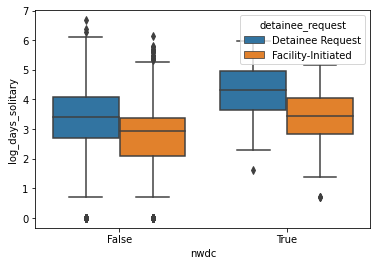

In [279]:
sns.boxplot(x='nwdc',y='log_days_solitary',data=pogo,hue='detainee_request')

In [280]:
pogo.groupby(by=["nwdc"])["days_solitary"].describe()

,count,mean,std,min,25%,50%,75%,max
nwdc,,,,,,,,
False,6300.0,29.320000,39.862318,0.0,9.0,20.0,31.0,790.0
True,139.0,69.884892,72.575506,2.0,22.5,42.0,94.5,391.0


In [281]:
pogo.groupby(by=["nwdc","placement_reason_type"])["days_solitary"].describe()

count       mean        std   min   25%  \
nwdc  placement_reason_type                                                
False Disciplinary              2776.0  23.703530  16.386096   0.0  15.0   
      Facility Security Threat   556.0  45.156475  45.069783   0.0  19.0   
      Hunger Strike              225.0   6.395556  14.889143   0.0   3.0   
      Medical                    264.0  10.208333  14.639852   0.0   1.0   
      Mental Illness             145.0  21.786207  27.102477   0.0   5.0   
      Other                       49.0  29.653061  27.992969   1.0  10.0   
      Pending Disciplinary       365.0   7.257534  18.865909   0.0   3.0   
      Protective Custody        1636.0  49.500000  61.996996   0.0  16.0   
      Suicide Risk Placement     284.0   5.038732   6.544918   0.0   1.0   
True  Disciplinary                27.0  24.777778  16.312650   2.0  14.5   
      Facility Security Threat    38.0  64.526316  40.844290  10.0  32.0   
      Medical                      1.0  20.000000        NaN  20.0  20.0   
      Mental Illness               2.0  16.000000  16.970563   4.0  10.0   
      Other                        2.0  14.000000  16.970563   2.0   8.0   
      Pending Disciplinary         4.0   8.000000   4.320494   2.0   6.5   
      Protective Custody          65.0  99.707692  89.608475   5.0  35.0   

                                 50%     75%    max  
nwdc  placement_reason_type                          
False Disciplinary              21.0   29.00  303.0  
      Facility Security Threat  31.0   55.00  330.0  
      Hunger Strike              4.0    7.00  219.0  
      Medical                    5.0   13.25  112.0  
      Mental Illness            12.0   28.00  164.0  
      Other                     22.0   45.00  133.0  
      Pending Disciplinary       4.0    7.00  287.0  
      Protective Custody        30.0   60.00  790.0  
      Suicide Risk Placement     3.0    6.00   45.0  
True  Disciplinary              22.0   29.00   77.0  
      Facility Security Threat  51.0  100.00  162.0  
      Medical                   20.0   20.00   20.0  
      Mental Illness            16.0   22.00   28.0  
      Other                     14.0   20.00   26.0  
      Pending Disciplinary       9.0   10.50   12.0  
      Protective Custody        73.0  139.00  391.0

In [282]:
df.groupby(by=["placement_reason"])["days_solitary"].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
placement_reason,,,,,,,,
Disciplinary,130.0,26.215385,27.254751,2.0,17.00,22.5,30.00,288.0
Protective Custody: Other Detainee Safety,87.0,94.045977,105.456693,2.0,27.50,63.0,130.00,691.0
Facility Security Threat: Other,37.0,54.216216,40.296909,11.0,27.00,35.0,86.00,162.0
Facility Security Threat: Violent or Disruptive Behavior,25.0,79.360000,95.315214,6.0,33.00,47.0,97.00,449.0
Protective Custody: Gang Status (Protective Custody Only),25.0,138.920000,129.959263,4.0,39.00,83.0,207.00,423.0
Facility Security Threat: Gang Member Status (Not Protective Custody),19.0,68.526316,110.713027,7.0,28.50,34.0,61.50,509.0
Medical: Observation,9.0,8.777778,7.562701,1.0,1.00,7.0,15.00,20.0
Mental Illness,9.0,41.666667,43.674936,4.0,21.00,28.0,44.00,147.0
Pending Investigation of Disciplinary Violation,8.0,6.750000,3.370036,2.0,4.00,7.0,8.50,12.0


In [283]:
df.groupby(by=["placement_reason_type", 'detainee_request'])["days_solitary"].describe()

count        mean         std  \
placement_reason_type    detainee_request                                    
Disciplinary             Facility-Initiated  130.0   26.215385   27.254751   
Facility Security Threat Facility-Initiated   83.0   64.963855   78.703123   
Hunger Strike            Facility-Initiated    1.0    4.000000         NaN   
Medical                  Facility-Initiated   13.0   10.538462    9.170745   
Mental Illness           Facility-Initiated    9.0   41.666667   43.674936   
Other                    Detainee Request      2.0   34.500000   12.020815   
                         Facility-Initiated    1.0    2.000000         NaN   
Pending Disciplinary     Facility-Initiated    8.0    6.750000    3.370036   
Protective Custody       Detainee Request    105.0  120.466667  130.815788   
                         Facility-Initiated   19.0   49.789474   49.921693   

                                              min    25%   50%     75%    max  
placement_reason_type    detainee_request                                      
Disciplinary             Facility-Initiated   2.0  17.00  22.5   30.00  288.0  
Facility Security Threat Facility-Initiated   6.0  27.50  39.0   77.00  509.0  
Hunger Strike            Facility-Initiated   4.0   4.00   4.0    4.00    4.0  
Medical                  Facility-Initiated   1.0   3.00   8.0   15.00   32.0  
Mental Illness           Facility-Initiated   4.0  21.00  28.0   44.00  147.0  
Other                    Detainee Request    26.0  30.25  34.5   38.75   43.0  
                         Facility-Initiated   2.0   2.00   2.0    2.00    2.0  
Pending Disciplinary     Facility-Initiated   2.0   4.00   7.0    8.50   12.0  
Protective Custody       Detainee Request     3.0  32.00  75.0  155.00  781.0  
                         Facility-Initiated   2.0  12.00  35.0   68.00  175.0

In [284]:
pogo['detainee_request'].value_counts()

Facility-Initiated    5090
Detainee Request      1469
Name: detainee_request, dtype: int64

In [285]:
facility_init = pogo['detainee_request'] == 'Facility-Initiated'

In [286]:
# Only facility-initated segregation: NWDC versus all other facilities
pogo[facility_init].groupby(by=["nwdc"])["days_solitary"].describe()

,count,mean,std,min,25%,50%,75%,max
nwdc,,,,,,,,
False,4949.0,23.598101,27.150512,0.0,8.0,19.0,29.0,466.0
True,81.0,45.938272,40.352926,2.0,17.0,31.0,57.0,175.0


In [287]:
pogo.groupby(by=["nwdc", 'detainee_request', 'placement_reason_type'])["days_solitary"].describe()

count        mean  \
nwdc  detainee_request   placement_reason_type                          
False Detainee Request   Disciplinary                 1.0   47.000000   
                         Hunger Strike                4.0    8.250000   
                         Other                       23.0   36.739130   
                         Pending Disciplinary         1.0    1.000000   
                         Protective Custody        1320.0   50.723485   
                         Suicide Risk Placement       2.0   24.000000   
      Facility-Initiated Disciplinary              2775.0   23.695135   
                         Facility Security Threat   556.0   45.156475   
                         Hunger Strike              221.0    6.361991   
                         Medical                    264.0   10.208333   
                         Mental Illness             145.0   21.786207   
                         Other                       26.0   23.384615   
                         Pending Disciplinary       364.0    7.274725   
                         Protective Custody         316.0   44.389241   
                         Suicide Risk Placement     282.0    4.904255   
True  Detainee Request   Other                        1.0   26.000000   
                         Protective Custody          57.0  104.684211   
      Facility-Initiated Disciplinary                27.0   24.777778   
                         Facility Security Threat    38.0   64.526316   
                         Medical                      1.0   20.000000   
                         Mental Illness               2.0   16.000000   
                         Other                        1.0    2.000000   
                         Pending Disciplinary         4.0    8.000000   
                         Protective Custody           8.0   64.250000   

                                                         std   min    25%  \
nwdc  detainee_request   placement_reason_type                              
False Detainee Request   Disciplinary                    NaN  47.0  47.00   
                         Hunger Strike              5.619905   2.0   4.25   
                         Other                     27.191605   2.0  17.00   
                         Pending Disciplinary            NaN   1.0   1.00   
                         Protective Custody        65.005325   0.0  15.00   
                         Suicide Risk Placement    26.870058   5.0  14.50   
      Facility-Initiated Disciplinary              16.383077   0.0  15.00   
                         Facility Security Threat  45.069783   0.0  19.00   
                         Hunger Strike             15.007429   0.0   3.00   
                         Medical                   14.639852   0.0   1.00   
                         Mental Illness            27.102477   0.0   5.00   
                         Other                     27.691265   1.0   6.50   
                         Pending Disciplinary      18.889014   0.0   3.00   
                         Protective Custody        47.154361   0.0  18.00   
                         Suicide Risk Placement     6.163956   0.0   1.00   
True  Detainee Request   Other                           NaN  26.0  26.00   
                         Protective Custody        92.505243   5.0  39.00   
      Facility-Initiated Disciplinary              16.312650   2.0  14.50   
                         Facility Security Threat  40.844290  10.0  32.00   
                         Medical                         NaN  20.0  20.00   
                         Mental Illness            16.970563   4.0  10.00   
                         Other                           NaN   2.0   2.00   
                         Pending Disciplinary       4.320494   2.0   6.50   
                         Protective Custody        57.601463   5.0  30.75   

                                                    50%     75%    max  
nwdc  detainee_request   placement_reason_type                          
Fals

In [288]:
pogo.set_index('placement_date').groupby('facility')['days_solitary'].mean().rank(ascending=False)[pogo_nwdc_str]

2.0

In [289]:
pogo.set_index('placement_date').groupby([pd.Grouper(freq='Q'),'facility'])['days_solitary'].mean().rank(pct=False, ascending=False).unstack()[pogo_nwdc_str]

placement_date
2016-03-31     23.0
2016-06-30     34.0
2016-09-30      9.0
2016-12-31    175.0
2017-03-31     16.0
2017-06-30     15.0
2017-09-30     39.0
2017-12-31     83.0
2018-03-31     95.0
2018-06-30    197.0
Freq: Q-DEC, Name: TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA), dtype: float64

In [290]:
pogo.set_index('placement_date').groupby([pd.Grouper(freq='Q'),'facility'])['days_solitary'].mean().unstack()[pogo_nwdc_str]

placement_date
2016-03-31     85.705882
2016-06-30     71.333333
2016-09-30    112.571429
2016-12-31     34.555556
2017-03-31     95.857143
2017-06-30    100.347826
2017-09-30     66.500000
2017-12-31     48.217391
2018-03-31     46.562500
2018-06-30     31.545455
Freq: Q-DEC, Name: TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA), dtype: float64

In [291]:
pogo[facility_init].set_index('placement_date').groupby('facility')['days_solitary'].mean().rank(ascending=False)[pogo_nwdc_str]

7.0

### Facility population

Bringing in standardized `DETLOC` codes from ICE Facilities List

In [292]:
facil_df = pd.read_csv('../../../ice-facilities/import/output/ICEFacilityListReport.csv.gz',
                      **csv_opts,
                      header=8)

In [293]:
facil_df.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0.00%,0,0,0.00%,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0.00%,0,0,0.00%,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,8.75%,800,372,101.92%,"1,207",5
3,RICRANS,"ACI (CRANSTON, RHODE ISLAND)",39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,02920,1,BOS,BOS,...,No,NaN,0,400,0.00%,0,0,0.00%,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0.00%,0,0,0.00%,0,0


In [294]:
# Quick and dirty cleaning of facilities data
for col in facil_df.columns:
    try:
        facil_df.loc[:, col] = facil_df.loc[:, col].astype(str)
        facil_df.loc[:, col] = facil_df.loc[:, col].str.replace(',','')
        facil_df.loc[:, col] = facil_df.loc[:, col].str.replace('$','')
        facil_df.loc[:, col] = facil_df.loc[:, col].str.replace('%','')
        facil_df.loc[:, col] = facil_df.loc[:, col].astype(int)
    except ValueError:
        pass

In [295]:
facil_name = facil_df.set_index('DETLOC')['Name']

In [296]:
facil_detloc_df = pd.read_csv('../hand/icij-pogo-facilities.csv')

In [297]:
facil_detloc_df.set_index('detloc').join(facil_name)

,facility_aor,state,facility,facility_id,dataset,Name
ADLNTCA,LOS (Los Angeles),CA,CA - Adelanto Correctional Facility,adelanto_correctional_facility_ca,icij,ADELANTO ICE PROCESSING CENTER
ADLNTCA,LOS (Los Angeles),NaN,ADELANTO ICE PROCESSING CENTER (CA),NaN,pogo,ADELANTO ICE PROCESSING CENTER
ADLNTCA,NaN,CA,CA - Adelanto Correctional Facility,adelanto_correctional_facility_ca,icij,ADELANTO ICE PROCESSING CENTER
ALLEGNY,BUF (Buffalo),NY,NY - Allegany County Jail,allegany_county_jail_ny,icij,ALLEGANY COUNTY JAIL
ATLANGA,ATL (Atlanta),GA,GA - Atlanta City Detention Center,atlanta_city_detention_center_pretrial_ga,icij,ATLANTA CITY DETENTION CENTER
...,...,...,...,...,...,...
YORCOPA,PHI (Philadelphia),PA,PA - York County Prison,york_county_prison_pa,icij,YORK COUNTY PRISON
YORCOPA,PHI (Philadelphia),NaN,YORK COUNTY PRISON (PA),NaN,pogo,YORK COUNTY PRISON
YORCOSC,ATL (Atlanta),SC,SC - York County Detention Center,york_county_detention_center_sc,icij,YORK COUNTY DETENTION CENTER
YUBAJCA,SFR (San Francisco),CA,CA - Yuba County Jail,yuba_county_jail_ca,icij,YUBA COUNTY JAIL


In [298]:
facil_detloc_df.to_csv('../output/icij-pogo-facilities.csv')

In [299]:
facil_detloc = dict(zip(facil_detloc_df['facility'], facil_detloc_df['detloc']))

In [300]:
icij['detloc'] = icij['facility'].replace(facil_detloc)

In [301]:
pogo['detloc'] = pogo['facility'].replace(facil_detloc)

### Stats by facility operator

In [302]:
detloc_operator = facil_df[['DETLOC', 'Facility Operator']].set_index('DETLOC')

In [303]:
pogo = pogo.join(detloc_operator, on='detloc')

In [304]:
pogo['Facility Operator'] = pogo['Facility Operator'].fillna('UNKNOWN')
pogo.groupby('Facility Operator')['days_solitary'].mean().sort_values()

Facility Operator
AKAL                     1.378378
COUNTY (PRISON)          5.375000
ASSET (GUARD)            7.705128
AHTNA (GUARD)           19.050000
AGS                     21.901299
nan                     23.750000
CCA                     25.788732
COUNTY (CORRECTIONS)    26.765152
ICA                     28.878173
COUNTY (SHERIFF)        29.256458
LASALLE CORRECTIONS     33.223022
GEO                     34.266511
COUNTY                  37.875000
M&TC                    39.385621
BOP                     42.000000
CITY                    44.395833
GPS-ASSET               49.270833
COUNTY (JAILER)         60.000000
Name: days_solitary, dtype: float64

In [305]:
facil_df.set_index('DETLOC')['FY17 ADP'].sort_values(ascending=False).head(15)

DETLOC
STFRCTX     994.42
Redacted     96.98
Redacted     95.73
Redacted     95.33
STRAFNH      94.73
Redacted     94.05
HOUICDF     931.68
Redacted    920.36
Redacted     89.03
Redacted     88.46
CHARLSC      83.15
MONTGTX     829.08
FREEBMN      82.19
OTROPNM      80.14
STTAMLA       8.75
Name: FY17 ADP, dtype: object

In [306]:
facil_capacity = facil_df.set_index('DETLOC')['Capacity']
facil_capacity = facil_capacity[facil_capacity != 'AS NEEDED']
facil_capacity = facil_capacity.astype(int)
facil_capacity.sort_values(ascending=False).head(15)

DETLOC
STFRCTX     2400
STWRTGA     1966
ADLNTCA     1940
STCDFTX     1890
WILLCTX     1700
CSCNWWA     1575
EAZ         1550
LANCACA     1400
Redacted    1200
PIC         1175
JENADLA     1160
POLKCTX     1054
MONTGTX     1050
HOUICDF     1000
OTRPCNM     1000
Name: Capacity, dtype: int64

## Analysis of ADP, ALOS

In [307]:
with open(f'../hand/adp_dict.yaml', 'r') as yamlfile:
    adp_dict = yaml.load(yamlfile)
    
with open(f'../hand/alos_dict.yaml', 'r') as yamlfile:
    alos_dict = yaml.load(yamlfile)

In [308]:
adp = pd.DataFrame(adp_dict).astype('float')

In [309]:
alos = pd.DataFrame(alos_dict).astype('float')

In [310]:
alos = alos.drop('Redacted', axis=1)

In [311]:
alos.dropna(how='all', axis=1)

,ABQHOLD,ABRXSPA,ADLNTCA,AFRC,AGAHOLD,AGMDCCA,AIRHOPR,AKCOOKI,AKFAIRB,AKKETCH,...,YAKHOLD,YANCOSD,YAVAPAZ,YAVCVAZ,YELLOMT,YIKIMWA,YORCOPA,YORCOSC,YUBAJCA,YUMHOLD
FY15 ALOS,0.0,56.0,52.0,71.0,1.0,5.0,2.0,10.0,NaN,NaN,...,0.0,NaN,NaN,1.0,2.0,2.0,45.0,4.0,48.0,0.0
FY16 ALOS,0.0,120.0,51.0,NaN,NaN,7.0,2.0,5.0,NaN,1.0,...,0.0,NaN,3.0,1.0,2.0,2.0,48.0,5.0,57.0,0.0
FY17 ALOS,0.0,147.0,71.0,NaN,0.0,6.0,1.0,5.0,1.0,NaN,...,0.0,3.0,NaN,1.0,2.0,6.0,43.0,4.0,42.0,0.0
FY18 ALOS,0.0,NaN,70.0,NaN,NaN,7.0,NaN,8.0,NaN,NaN,...,0.0,3.0,NaN,1.0,2.0,3.0,60.0,4.0,74.0,NaN


In [312]:
alos.mean().dropna().rank(pct=True, ascending=True)['CSCNWWA']

0.9772727272727273

In [313]:
# NWDC ALOS percentile rank
alos.T.rank(pct=True, ascending=True).loc['CSCNWWA']

FY15 ALOS    0.974359
FY16 ALOS    0.975578
FY17 ALOS    0.977064
FY18 ALOS    0.949231
Name: CSCNWWA, dtype: float64

In [314]:
alos.T.loc['CSCNWWA']

FY15 ALOS    82.0
FY16 ALOS    86.0
FY17 ALOS    87.0
FY18 ALOS    97.0
Name: CSCNWWA, dtype: float64

In [315]:
alos.index

Index(['FY15 ALOS', 'FY16 ALOS', 'FY17 ALOS', 'FY18 ALOS'], dtype='object')

In [316]:
alos.T.rank(pct=True, ascending=True).loc['CSCNWWA'].mean()

0.9690580924857239

In [317]:
# NWDC ALOS absolute rank
alos.T.rank(ascending=False).loc['CSCNWWA']

FY15 ALOS    11.0
FY16 ALOS    10.5
FY17 ALOS    11.0
FY18 ALOS    17.5
Name: CSCNWWA, dtype: float64

In [318]:
alos.loc[:,'CSCNWWA']

FY15 ALOS    82.0
FY16 ALOS    86.0
FY17 ALOS    87.0
FY18 ALOS    97.0
Name: CSCNWWA, dtype: float64

In [319]:
nwdc_adp = adp.loc[:,'CSCNWWA']
nwdc_alos = alos.loc[:,'CSCNWWA']

In [320]:
nwdc_alos

FY15 ALOS    82.0
FY16 ALOS    86.0
FY17 ALOS    87.0
FY18 ALOS    97.0
Name: CSCNWWA, dtype: float64

In [321]:
nwdc_adp.index = ['2008-10-01',
                  '2009-10-01',
                  '2010-10-01',
                  '2011-10-01',
                  '2012-10-01',
                  '2013-10-01',
                  '2014-10-01',
                  '2015-10-01',
                  '2016-10-01',
                  '2017-10-01',
                 ]

nwdc_alos.index = ['2014-10-01',
                   '2015-10-01',
                   '2016-10-01',
                   '2017-10-01',
                  ]

In [322]:
nwdc_adp.index = pd.to_datetime(nwdc_adp.index)
nwdc_alos.index = pd.to_datetime(nwdc_alos.index)

In [323]:
fy14_fy17_adp = nwdc_adp.loc['2013':'2016']
fy15_fy17_alos = nwdc_alos.loc['2014':'2016']

In [324]:
df_full_fy = df[(df['placement_date'] > '2013-10-01') & (df['placement_date'] < '2017-10-01')]

In [325]:
fy14_fy17_adp

2013-10-01    1400.0
2014-10-01    1132.0
2015-10-01    1411.0
2016-10-01    1423.0
Name: CSCNWWA, dtype: float64

In [326]:
fy15_fy17_alos

2014-10-01    82.0
2015-10-01    86.0
2016-10-01    87.0
Name: CSCNWWA, dtype: float64

In [327]:
min_date = df_full_fy['placement_date'].min()
max_date = df_full_fy['placement_date'].max()
timeline = pd.date_range(min_date, max_date, freq='D')
years = timeline.year.unique()

counts = pd.Series(index=timeline)
for day in timeline:
    in_range = df_full_fy[(df_full_fy['placement_date'] <= day) & (df_full_fy['release_date'] >= day)]
    counts[day] = len(in_range)

/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [328]:
fy14_fy17_solitary = counts.resample('AS-OCT').mean()

In [329]:
fy14_fy17_solitary.name = 'solitary_ADP'

In [330]:
fy14_fy17_solitary_length = df_full_fy.set_index('placement_date').resample('AS-OCT')['days_solitary'].mean()
fy14_fy17_solitary_length.name = 'avg_solitary_length'

In [331]:
nwdc_per_capita = pd.concat([fy14_fy17_solitary, fy14_fy17_adp], axis=1)

In [332]:
nwdc_per_capita = nwdc_per_capita.rename({'CSCNWWA': 'ADP'}, axis=1)

In [333]:
nwdc_per_capita

,solitary_ADP,ADP
2013-10-01,8.725762,1400.0
2014-10-01,10.660274,1132.0
2015-10-01,11.401639,1411.0
2016-10-01,15.042017,1423.0


In [334]:
nwdc_per_capita['per_capita'] = nwdc_per_capita['solitary_ADP'] / nwdc_per_capita['ADP']

In [335]:
nwdc_per_capita['per_capita'] * 100

2013-10-01    0.623269
2014-10-01    0.941720
2015-10-01    0.808054
2016-10-01    1.057064
Freq: AS-OCT, Name: per_capita, dtype: float64

In [336]:
# pogo_fy_17 = pogo[(pogo['placement_date'] > '2016-10-01') & (pogo['placement_date'] < '2017-10-01')]

In [337]:
min_date = pogo['placement_date'].min()
max_date = pogo['release_date'].max()
timeline = pd.date_range(min_date, max_date, freq='D')
years = timeline.year.unique()

counts = dict()

for facility in pogo['facility'].unique():
    facil_count = pd.Series(index=timeline)
    facil_temp = pogo[pogo['facility'] == facility]
    for day in timeline:
        in_range = facil_temp[(facil_temp['placement_date'] <= day) & (facil_temp['release_date'] >= day)]
        facil_count[day] = len(in_range)
        facil_solitary_adp = facil_count.resample('AS-OCT').mean()
    counts[facility] = facil_solitary_adp.loc['2016']

/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


KeyboardInterrupt: 

Calculation of average daily solitary pop. for NWDC based on POGO is close but not exactly the same as when calculated with UWCHR dataset. Why not? Because UWCHR dataset includes people placed prior to POGO dataset?

In [ ]:
counts[pogo_nwdc_str]

In [ ]:
detloc_count = pogo.groupby('detloc')['record_id'].count()
top_15_detloc = set(detloc_count.sort_values(ascending=False).head(15).index)

In [ ]:
detloc_count_fy17 = pogo.set_index('placement_date').loc['2016'].groupby('detloc')['record_id'].count()


In [ ]:
detloc_count_fy17.head()

In [ ]:
facil_solitary_adp = pd.DataFrame.from_dict(counts).T
facil_solitary_adp = facil_solitary_adp.rename({0: 'solitary_ADP'}, axis=1)

In [ ]:
facil_solitary_adp.columns = ['FY17_solitary_ADP']

In [ ]:
facil_solitary_adp.sort_values(by='FY17_solitary_ADP',ascending=False).head(10)

In [ ]:
facil_solitary_adp = facil_solitary_adp.join(pogo.set_index('facility')['detloc'].drop_duplicates())

In [ ]:
facil_solitary_adp.set_index('detloc', inplace=True)

In [ ]:
pogo_fy17_adps = facil_solitary_adp.join(facil_df.set_index('DETLOC')['FY17 ADP'])
pogo_fy17_adps['FY17 Solitary per capita'] = pogo_fy17_adps['FY17_solitary_ADP'] / pogo_fy17_adps['FY17 ADP'] * 100
pogo_fy17_adps.sort_values(by='FY17_solitary_ADP', ascending=False).head(15)
# pogo_fy17_adps.sort_values(by='FY17 Solitary per capita', ascending=False).head(15)

In [ ]:
pogo_fy17_adps.sort_values(by='FY17 Solitary per capita', ascending=False).head(15)

In [ ]:
pogo_avg_solitary_length = pogo.set_index('placement_date').groupby(['detloc',pd.Grouper(freq='AS-OCT')])['days_solitary'].mean().unstack()

In [ ]:
pogo_med_solitary_length = pogo.set_index('placement_date').groupby(['detloc',pd.Grouper(freq='AS-OCT')])['days_solitary'].median().unstack()

In [ ]:
pogo_med_solitary_length.head(10)

In [ ]:
pogo_fy17_avg_solitary_length = pogo_avg_solitary_length.T.loc['2016'].T

In [ ]:
pogo_fy17_med_solitary_length = pogo_med_solitary_length.T.loc['2016'].T

In [ ]:
pogo_fy17_avg_solitary_length.columns = ['FY17 avg solitary length']

In [ ]:
pogo_fy17_med_solitary_length.columns = ['FY17 med solitary length']

In [ ]:
alos_fy17 = pd.DataFrame(alos.T['FY17 ALOS'])

In [ ]:
solitary_v_alos_fy17 = pogo_fy17_avg_solitary_length.join(alos_fy17)

In [ ]:
solitary_v_alos_fy17.columns = ['FY17 avg solitary length', 'FY17 ALOS']

In [ ]:
solitary_v_alos_fy17['Solitary / ALOS ratio'] = solitary_v_alos_fy17['FY17 avg solitary length'] / solitary_v_alos_fy17['FY17 ALOS']

In [ ]:
solitary_v_alos_fy17 = solitary_v_alos_fy17.join(pd.DataFrame(facil_capacity))

In [ ]:
# solitary_v_alos_fy17 = solitary_v_alos_fy17.loc[solitary_v_alos_fy17.index.isin(top_15_detloc)]

In [ ]:
# solitary_v_alos_fy17 = solitary_v_alos_fy17.sort_values(by='Solitary / ALOS ratio', ascending=False)

In [ ]:
# solitary_v_alos_fy17 = solitary_v_alos_fy17.reset_index().reset_index().rename({'index': 'Solitary / ALOS ratio rank'}, axis=1)

In [ ]:
solitary_v_alos_fy17.head()

In [ ]:
# solitary_v_alos_fy17['Solitary / ALOS ratio rank'] = solitary_v_alos_fy17['Solitary / ALOS ratio rank'] + 1

In [ ]:
# solitary_v_alos_fy17.set_index('detloc').loc['CSCNWWA']

In [ ]:
# solitary_v_alos_fy17.set_index('detloc', inplace=True)

In [ ]:
solitary_v_alos_fy17['solitary_placements_fy17'] = detloc_count_fy17

In [ ]:
temp = solitary_v_alos_fy17.join(pogo_fy17_adps)

In [ ]:
temp = temp.join(pogo_fy17_med_solitary_length)

In [ ]:
# temp = temp.drop(['Capacity', 'solitary_placements'], axis=1)

In [ ]:
temp_2 = facil_detloc_df[['detloc', 'facility']].drop_duplicates(subset='detloc').set_index('detloc')

In [ ]:
temp = temp.join(temp_2)

In [ ]:
# temp.to_csv('../output/FY17-solitary-stats-draft.csv')

In [ ]:
temp.sort_values(by='FY17_solitary_ADP', ascending=False).head(15)

## Visualizing/calculating rank over time

In [ ]:
# pogo['placement_year'] = pogo['placement_date'].map(lambda x: x.year)

In [ ]:
facil_count = pogo.groupby('facility')['record_id'].count()

In [ ]:
facil_count = facil_count.sort_values(ascending=False)

In [ ]:
top_15_facil = facil_count.sort_values(ascending=False).head(15).index

In [ ]:
edit_labels = pd.Series(facil_count.index + ' - ' + facil_count.values.astype(str)).head(15)

In [ ]:
edit_labels.values

In [ ]:
avg_days = pogo.set_index('placement_date').groupby([pd.Grouper(freq='Q'),'facility'])['days_solitary'].mean()

In [ ]:
avg_days

In [ ]:
avg_days = pogo.set_index('placement_date').groupby([pd.Grouper(freq='Q'),'facility'])['days_solitary'].mean()
avg_days.name = 'mean_days_solitary'
avg_days = avg_days.reset_index().set_index('facility')
avg_days = avg_days.sort_values(by=['placement_date', 'mean_days_solitary'],ascending=[True, False])

In [ ]:
# avg_days.set_index('facility').loc[pogo_nwdc_str]

In [ ]:
avg_days = avg_days.reset_index().set_index('placement_date')

In [ ]:
for period in avg_days.index.unique():
    avg_days.loc[period, 'rank'] = avg_days.loc[period, 'mean_days_solitary'].rank(ascending=False)

In [ ]:
data = avg_days.reset_index().set_index('facility')

In [ ]:
data = data.reset_index().set_index('placement_date').dropna()

In [ ]:
temp = data[data['facility'] == pogo_nwdc_str]

In [ ]:
temp

In [ ]:
temp.reset_index().set_index('placement_date')['mean_days_solitary'].plot()

Starting to become legible... NWDC consistently among top large facilities in terms of average length of solitary placement.

In [ ]:
len(set(data['facility']))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

color=iter(cm.viridis_r(np.linspace(0,1,15)))
grey=iter(cm.Greys(np.linspace(0,1,100)))

for facil in top_15_facil:
# for facil in data['facility'].unique():
    if facil == pogo_nwdc_str:
        data_sub = data[data['facility'] == facil]
        data_sub['mean_days_solitary'].name = facil
        c=next(color)
        ax.plot(data_sub['mean_days_solitary'], color=c, alpha=1, linewidth=3)
    else:
        data_sub = data[data['facility'] == facil]
        data_sub['mean_days_solitary'].name = facil
        c=next(color)
        ax.plot(data_sub['mean_days_solitary'], color=c, alpha=.9)

ax.yaxis.grid(color='#DDDDDD')
plt.suptitle('Avg. length of solitary confinement in immigration detention (quarterly)', fontsize=20)
plt.title('Top 15 ICE facilities by total solitary placements, Jan. 2016 - May 2018', fontsize=14)
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(loc='upper right', bbox_to_anchor=(1.9, 1), fontsize=12,
                title='Detention Facility - Total Solitary Placements',
                title_fontsize=14, labels=edit_labels.values)
plt.ylabel('Length of stay (days)', fontsize=14)
txt='Source: ICE data obtained via FOIA by Project on Government Oversight\nAnalysis and figure by UW Center for Human Rights'
plt.figtext(1.58, .05, txt, wrap=True, horizontalalignment='right', fontsize=12)
fig.savefig('../output/avg_solitary_length.png', dpi=300, bbox_inches='tight')
plt.show()
    

In [ ]:
data = pogo[pogo['facility'].isin(top_15_facil)]

In [ ]:
data

In [ ]:
order = data.groupby('detloc')['record_id'].count().sort_values(ascending=False).index

In [ ]:
# Top 15 facilities by solitary placements distribution of solitary length (in order of # of placements)
ax = sns.boxplot(x='detloc',y='log_days_solitary',data=data, order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [ ]:
# Top 15 facilities by solitary placements distribution of solitary length
ax = sns.boxplot(x='detloc',y='log_days_solitary',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

# ADP/ALOS

In [ ]:
# adp.index = pd.to_datetime(adp.index)
# alos.index = pd.to_datetime(alos.index )

In [ ]:
adp.index = ['2008-10-01',
             '2009-10-01',
             '2010-10-01',
             '2011-10-01',
             '2012-10-01',
             '2013-10-01',
             '2014-10-01',
             '2015-10-01',
             '2016-10-01',
             '2017-10-01',
            ]
alos.index = ['2014-10-01',
              '2015-10-01',
              '2016-10-01',
              '2017-10-01',
             ]

In [ ]:
adp = adp['2015':].T
alos = alos['2015':].T

In [ ]:
fy_sol_alos = pogo.set_index('placement_date').groupby([pd.Grouper(freq='AS-OCT'),'detloc'])['days_solitary'].mean()
fy_sol_count = pogo.set_index('placement_date').groupby([pd.Grouper(freq='AS-OCT'),'detloc'])['record_id'].count()

In [ ]:
fy_sol_alos = fy_sol_alos.unstack().T
fy_sol_count = fy_sol_count.unstack().T

In [ ]:
adp.columns = ['FY16 ADP', 'FY17 ADP', 'FY18 ADP']
alos.columns = ['FY16 ALOS', 'FY17 ALOS', 'FY18 ALOS']
fy_sol_alos.columns = ['FY16 solitary ALOS', 'FY17 solitary ALOS', 'FY18 solitary ALOS']
fy_sol_count.columns = ['FY16 solitary count', 'FY17 solitary count', 'FY18 solitary count']

In [ ]:
facil_solitary_adp.head()

In [ ]:
data = adp.join([alos, fy_sol_alos, fy_sol_count, facil_solitary_adp])

In [ ]:
data.head()

In [ ]:
data = data[data.loc[:,'FY16 ALOS'] < 500]
data = data[data.loc[:,'FY17 ALOS'] < 500]
data = data[data.loc[:,'FY18 ALOS'] < 500]

In [ ]:
fys = ['FY16',
       'FY17',
       'FY18']

In [ ]:
#this is currently excluding all but 1 redacted ORR facility

target_facil = 'CSCNWWA'

fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    adp_col = f'{fy} ADP'
    alos_col = f'{fy} ALOS'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=alos_col, y=adp_col, data=data)
    plt.scatter(x=alos_col, y=adp_col, c='r', data=data.loc[target_facil])
    
    plt.xlabel('ALOS')
    plt.xticks(np.arange(0, 450, step=50), rotation=45)
    plt.ylabel('ADP')
    plt.yticks(np.arange(0, 2001, step=200))
    plt.ylim(-100, 2000)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ADP, ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [ ]:
data[['FY16 solitary ALOS', 'FY17 solitary ALOS',
       'FY18 solitary ALOS', 'FY16 solitary count', 'FY17 solitary count',
       'FY18 solitary count', 'FY17_solitary_ADP']].to_csv('../output/solitary_stats.csv', sep='|')